# Assignment Overview
## JULIA ANTONIOLI, 60178


## Background Story  

ABC Insurance, once a market leader, has been noticing a worrying trend in its customer base – a gradual but steady increase in customer churn, alongside a static, sometimes faltering, customer lifetime value. The CEO, in a recent town hall, made it clear: "Our customers are the lifeblood of our business. Understanding them isn't just part of the job — it is the job."

Your task comes directly from the top: The CEO, in collaboration with the head of the marketing department, has formally requested a comprehensive analysis to unearth the hidden patterns within the customer data. They believe that the data holds the key to revitalizing ABC Insurance's customer engagement strategy, tailoring product offerings to individual needs, and ultimately turning the tide on churn.

## Data Description

The IT extracted three tables that contains the available information asked by the Head of Marketing: ABC_df_costumer, ABC_df_demographics, ABC_df_termination. 

Please download the data from: https://novasbe365-my.sharepoint.com/:f:/g/personal/nuno_silva_novasbe_pt/Ekl41SdwtkVOiW52LsaEy5QBo1mjQXHZKwKMeNSJRbEu3g?e=tgkSYD 

### Dataframes details 

#### df_customer:

Contains details about the customers, including their ID, address, policy start dates, and the current annual amounts for car, health, and house insurance.

##### Variables
INDIVIDUAL_ID: Unique identifier for the customer.

ADDRESS_ID: Address identifier for the customer.

CUST_ORIG_DATE: The original date when the customer joined.

DATE_OF_BIRTH: Customer's date of birth.

SOCIAL_SECURITY_NUMBER: Customer's SSN (for identification).

CUST_START_DATE: The start date of the customer's current policy.

CURR_ANN_AMT_CAR: Current annual amount paid for car insurance.

CURR_ANN_AMT_HEALTH: Current annual amount paid for health insurance.

CURR_ANN_AMT_HOUSE: Current annual amount paid for house insurance.


#### df_demographics:
Includes demographic information about the customers, such as income, family status, home ownership, and credit rating.

##### Variables

INDIVIDUAL_ID: Unique identifier for the customer (links to df_customer).

INCOME: Customer's income.

HAS_CHILDREN: Indicates if the customer has children.

LENGTH_OF_RESIDENCE: How long the customer has lived in their current residence.

MARITAL_STATUS: Customer's marital status.

HOME_MARKET_VALUE: Market value of the customer's home.

HOME_OWNER: Indicates if the customer owns their home.

COLLEGE_DEGREE: Indicates if the customer has a college degree.

GOOD_CREDIT: Indicates if the customer has good credit.

ADVANCED_STUDIES: Indicates if the customer has pursued advanced studies.


#### df_termination:

Lists customers who have suspended their policies, including the suspension date.

##### Variables

INDIVIDUAL_ID: Unique identifier for the customer (links to df_customer).

SUSPD_DATE: The date when the customer's policy was suspended.

## Question 1: Data Quality and Customer Understanding (30 points)

#### Background: Before delving into sophisticated analyses and model building, ensuring the integrity and quality of data is paramount. The provided datasets are critical for understanding ABC Insurance's clientele but may contain issues affecting their utility for further analysis.

#### Q1.1 Please perform the exploratory data analysis of the data. (20 points)

What specific metrics and techniques did you use to assess the quality of the data in each dataset? Describe the issues you identified in the datasets. For each issue, detail the impact it could have on analysis and decision-making processes. After cleaning, how did the data quality improve? Present metrics or observations to demonstrate the improvement in data quality.

#### Import necessary libraries

In [1]:
# Import all necessary libraries for the whole notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, roc_auc_score, RocCurveDisplay
from collections import Counter

#### Read Datasets & Merge

In [2]:
# Import customer dataset
customer = pd.read_csv("ABC_df_customer.csv", index_col = 0)
df_customer = pd.DataFrame(customer)
df_customer.head()

C:\Users\julia\AppData\Local\Temp\ipykernel_16296\365350052.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  customer = pd.read_csv("ABC_df_customer.csv", index_col = 0)


,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE
0,2.213000e+11,5.213000e+11,2018-12-09,1978-06-23,608-XX-7640,2018-12-09,1318.877997,517.999317,411
1,2.213001e+11,5.213001e+11,2018-01-02,1950-05-30,342-XX-6908,2018-01-02,1474.199182,558.417779,414
2,2.213007e+11,5.213002e+11,2009-09-23,1967-07-07,240-XX-9224,2009-09-23,1467.375112,701.649310,442
3,2.213016e+11,5.213006e+11,2022-07-25,1969-05-25,775-XX-6249,2022-07-25,1492.409561,401.517490,463
4,2.213016e+11,5.213006e+11,2006-10-11,1972-09-25,629-XX-7298,2006-10-11,1284.633494,772.857222,366


In [3]:
# Import demographics dataset
demographics = pd.read_csv("ABC_df_demographic.csv", index_col = 0)
df_demographics = pd.DataFrame(demographics)
df_demographics.head()

,INDIVIDUAL_ID,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES
0,2.213028e+11,187500.000,1.0,8.0,Single,300000 - 349999,1,1,1,Y
1,2.213032e+11,63750.000,0.0,0.0,Single,NaN,0,0,0,N
2,2.213032e+11,41250.000,0.0,15.0,Married,75000 - 99999,1,0,1,N
3,2.213032e+11,120558.264,0.0,0.0,NaN,1000 - 24999,1,0,0,N
4,2.213032e+11,187500.000,0.0,0.0,NaN,NaN,0,0,1,Y


In [4]:
# Import termination dataset
termination = pd.read_csv("ABC_df_termination.csv", index_col = 0)
df_termination = pd.DataFrame(termination)
df_termination.head()

,INDIVIDUAL_ID,SUSPD_DATE
0,2.213026e+11,2022-10-09
1,2.213028e+11,2022-04-24
2,2.213027e+11,2022-05-21
3,2.213002e+11,2022-04-27
4,2.213026e+11,2022-09-16


In [5]:
"""
Merge all the datasets to facilitate the data cleaning process. It was decided to do a left join to ensure that all records from the primary customer dataset are retained, regardless whether 
there is matching data in the other two datasets (demographics & termination). It is not important to have the data from the second and third dataset unless the customer is present in the first.

"""

df = df_customer.join(df_demographics.set_index("INDIVIDUAL_ID"), on = "INDIVIDUAL_ID", how = "left")
df = df.join(df_termination.set_index("INDIVIDUAL_ID"), on = "INDIVIDUAL_ID", how = "left")
df.head()

,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES,SUSPD_DATE
0,2.213000e+11,5.213000e+11,2018-12-09,1978-06-23,608-XX-7640,2018-12-09,1318.877997,517.999317,411,33750.0,2.0,15.0,Married,50000 - 74999,1.0,1.0,1.0,N,NaN
1,2.213001e+11,5.213001e+11,2018-01-02,1950-05-30,342-XX-6908,2018-01-02,1474.199182,558.417779,414,41250.0,0.0,2.0,Single,50000 - 74999,1.0,0.0,0.0,N,NaN
2,2.213007e+11,5.213002e+11,2009-09-23,1967-07-07,240-XX-9224,2009-09-23,1467.375112,701.649310,442,63750.0,0.0,10.0,Married,75000 - 99999,1.0,0.0,0.0,N,NaN
3,2.213016e+11,5.213006e+11,2022-07-25,1969-05-25,775-XX-6249,2022-07-25,1492.409561,401.517490,463,187500.0,2.0,6.0,Married,175000 - 199999,1.0,0.0,1.0,N,2021-12-22
4,2.213016e+11,5.213006e+11,2006-10-11,1972-09-25,629-XX-7298,2006-10-11,1284.633494,772.857222,366,131250.0,1.0,4.0,Married,225000 - 249999,1.0,1.0,1.0,Y,NaN


In [6]:
"""
Looking at the initial statistics of each column, some anomalies are seen which will all be addressed below in further detail.
"""

df.describe()

,INDIVIDUAL_ID,ADDRESS_ID,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT
count,2.303123e+06,2.303123e+06,2.303124e+06,2.303124e+06,2.303124e+06,2.133685e+06,2.133685e+06,2.133685e+06,2.133685e+06,2.133685e+06,2.133685e+06
mean,2.213018e+11,5.213007e+11,1.431069e+03,5.725299e+02,4.293221e+02,1.205605e+05,4.685410e-01,6.799839e+00,6.983810e-01,3.016068e-01,8.195713e-01
std,9.915268e+05,4.170653e+05,2.439311e+02,1.896686e+02,7.606463e+01,7.504671e+04,5.854283e-01,5.090874e+00,4.589609e-01,4.589556e-01,3.845442e-01
min,2.213000e+11,5.213000e+11,2.869633e+02,-3.516244e+02,9.000000e+01,7.500000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.213009e+11,5.213003e+11,1.264830e+03,4.442061e+02,3.770000e+02,7.125000e+04,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,2.213018e+11,5.213007e+11,1.425758e+03,5.720247e+02,4.270000e+02,1.205583e+05,0.000000e+00,6.801000e+00,1.000000e+00,0.000000e+00,1.000000e+00
75%,2.213027e+11,5.213010e+11,1.591793e+03,7.001292e+02,4.790000e+02,1.312500e+05,1.000000e+00,1.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00
max,2.213033e+11,5.213015e+11,2.769374e+03,1.617531e+03,8.870000e+02,3.750000e+05,6.000000e+00,1.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00


#### Completeness: Missing Values

The first dimension of data quality which is tackled is **Completeness**. When checking for missing values we can see that most columns have at least one missing value. Missing values can lead to biased analyses, inaccurate models, and misinformed business decisions, as they represent gaps in information that could be crucial for understanding customer behavior and insurance risk.Missing values can lead to biased analyses, inaccurate models, and misinformed business decisions, as they represent gaps in information that could be crucial for understanding customer behavior and insurance risk. 

In [7]:
# Checking for missing values
print(df.isna().sum())

# Percentage of missing values
round((df.isna().sum() / len(df))*100, 4)

INDIVIDUAL_ID                   1
ADDRESS_ID                      1
CUST_ORIG_DATE                  0
DATE_OF_BIRTH                   0
SOCIAL_SECURITY_NUMBER          0
CUST_START_DATE             91213
CURR_ANN_AMT_CAR                0
CURR_ANN_AMT_HEALTH             0
CURR_ANN_AMT_HOUSE              0
INCOME                     169439
HAS_CHILDREN               169439
LENGTH_OF_RESIDENCE        169439
MARITAL_STATUS             605334
HOME_MARKET_VALUE          361586
HOME_OWNER                 169439
COLLEGE_DEGREE             169439
GOOD_CREDIT                169439
ADVANCED_STUDIES           169439
SUSPD_DATE                2033964
dtype: int64


INDIVIDUAL_ID              0.0000
ADDRESS_ID                 0.0000
CUST_ORIG_DATE             0.0000
DATE_OF_BIRTH              0.0000
SOCIAL_SECURITY_NUMBER     0.0000
CUST_START_DATE            3.9604
CURR_ANN_AMT_CAR           0.0000
CURR_ANN_AMT_HEALTH        0.0000
CURR_ANN_AMT_HOUSE         0.0000
INCOME                     7.3569
HAS_CHILDREN               7.3569
LENGTH_OF_RESIDENCE        7.3569
MARITAL_STATUS            26.2832
HOME_MARKET_VALUE         15.6998
HOME_OWNER                 7.3569
COLLEGE_DEGREE             7.3569
GOOD_CREDIT                7.3569
ADVANCED_STUDIES           7.3569
SUSPD_DATE                88.3133
dtype: float64

In [8]:
"""
1. Those rows which had "INDIVIDUAL_ID" and "ADDRESS_ID" missing were deleted (listwise deletion). This is because if a unique identifier is missing, 
there is no way to distinguish this row from the others.

2. The 91,213 missing values in "CUST_START_DATE" have been filled with their respective value in the "CUST_ORIG_DATE" column. This was done based on the 
assumption that the majority of people who start using the company stick with the same policy and therefore would have a same start date. This assumption 
was taken due to the fact that many rows were missing this value and taking this reasonable assumption is better than loosing almost 100,000 rows.
"""

# Deleting the rows with missing values in individual_id and address_id as the unique identifier is essential 
df = df.loc[df["INDIVIDUAL_ID"].notna() & df["ADDRESS_ID"].notna()] 

# Filling the missing values of cust_start_date with the respective values in cust_orig_date
df["CUST_START_DATE"].fillna(df["CUST_ORIG_DATE"], inplace = True)

In [9]:
# Checking for missing values
df.isna().sum()

INDIVIDUAL_ID                   0
ADDRESS_ID                      0
CUST_ORIG_DATE                  0
DATE_OF_BIRTH                   0
SOCIAL_SECURITY_NUMBER          0
CUST_START_DATE                 0
CURR_ANN_AMT_CAR                0
CURR_ANN_AMT_HEALTH             0
CURR_ANN_AMT_HOUSE              0
INCOME                     169438
HAS_CHILDREN               169438
LENGTH_OF_RESIDENCE        169438
MARITAL_STATUS             605333
HOME_MARKET_VALUE          361585
HOME_OWNER                 169438
COLLEGE_DEGREE             169438
GOOD_CREDIT                169438
ADVANCED_STUDIES           169438
SUSPD_DATE                2033963
dtype: int64

In [10]:
"""
Many columns additionally were found to be missing data for an exact value of 169438 rows, including "INCOME", "HAS_CHILDREN", "LENGTH_OF_RESIDENCE", "HOME_OWNER", 
"COLLEGE_CREDIT" and "ADVANCED_STUDIES" (listwise deletion). This is probably because some clients have never provided this information to ABC Insurance. As these 
features maintain relevant information in understanding and segmenting a customer, these 169438 rows have been deleted from the dataset.
"""

# As 169438 values are missing for many relevant features, these rows will be deleted 
df = df.dropna(axis = 0, subset = ["INCOME"])

In [11]:
# Check missing values remaining
print(df.isna().sum())

(df[["MARITAL_STATUS", "HOME_MARKET_VALUE", "SUSPD_DATE"]].isna().sum() / len(df)).round(4)

INDIVIDUAL_ID                   0
ADDRESS_ID                      0
CUST_ORIG_DATE                  0
DATE_OF_BIRTH                   0
SOCIAL_SECURITY_NUMBER          0
CUST_START_DATE                 0
CURR_ANN_AMT_CAR                0
CURR_ANN_AMT_HEALTH             0
CURR_ANN_AMT_HOUSE              0
INCOME                          0
HAS_CHILDREN                    0
LENGTH_OF_RESIDENCE             0
MARITAL_STATUS             435895
HOME_MARKET_VALUE          192147
HOME_OWNER                      0
COLLEGE_DEGREE                  0
GOOD_CREDIT                     0
ADVANCED_STUDIES                0
SUSPD_DATE                1884536
dtype: int64


MARITAL_STATUS       0.2043
HOME_MARKET_VALUE    0.0901
SUSPD_DATE           0.8832
dtype: float64

In [12]:
"""
"HOME_MARKET_VALUE" has 192,147 missing values (9.01% of the entire database). It was decided to eliminate these rows (listwise deletion) as it is an essential feature 
in the insurance industry, and given that we are dealing with a big dataset, deleting 9% of rows will not jepordize model development.
"""

# Since Home Market Value is an essential feature in the insurance industry, it is acceptable to delete 9% of the database to maintain 
df.dropna(subset = ["HOME_MARKET_VALUE"], inplace = True)

After all these measures, we are left with two columns with missing values: "MARITAL_STATUS" missing 20.4% and "SUSPD_DATE" missing 88.3%. The missing values in these 
features will be dealt with and discussed later on. 

#### Consistency - Data Types & Dummy Variables

The next dimension to consider is **Consistency**. Having incorrect/inconsistent data types can create problems during the feature engineering phase, leading to the generation of bias in predictive modelling. This can skew the risk assessment, pricing algorithms, and customer segmentation, directly impacting the accuracy of churn predictions and the effectiveness of targeted marketing campaigns. Ensuring data type uniformity enhances the reliability of machine learning pipelines, thereby aligning with ABC Insurance's strategic objectives of data-driven decision-making and customer-centric product development. 

In [13]:
df.dtypes

INDIVIDUAL_ID             float64
ADDRESS_ID                float64
CUST_ORIG_DATE             object
DATE_OF_BIRTH              object
SOCIAL_SECURITY_NUMBER     object
CUST_START_DATE            object
CURR_ANN_AMT_CAR          float64
CURR_ANN_AMT_HEALTH       float64
CURR_ANN_AMT_HOUSE          int64
INCOME                    float64
HAS_CHILDREN              float64
LENGTH_OF_RESIDENCE       float64
MARITAL_STATUS             object
HOME_MARKET_VALUE          object
HOME_OWNER                float64
COLLEGE_DEGREE            float64
GOOD_CREDIT               float64
ADVANCED_STUDIES           object
SUSPD_DATE                 object
dtype: object

In [14]:
"""
1. "INDIVIDUAL_ID" and "ADDRESS_ID" were converted from float to string because they are unique identifiers and not numerical variables where arithmetic operations 
would apply. Treating them as strings prevents unintended calculations and enhances data integrity

2. All of the columns including a date in the following format "dd/mm/yyyy" were changed from string to datetime 

3. "HAS_CHILDREN" was changed from float to integer, given that it is impossible to have a decimal of a child
"""

# Changing column types to the correct types
df["INDIVIDUAL_ID"] = df["INDIVIDUAL_ID"].astype(str)
df["ADDRESS_ID"] = df["ADDRESS_ID"].astype(str)

df["CUST_ORIG_DATE"] = pd.to_datetime(df["CUST_ORIG_DATE"])
df["DATE_OF_BIRTH"] = pd.to_datetime(df["DATE_OF_BIRTH"])
df["CUST_START_DATE"] = pd.to_datetime(df["CUST_START_DATE"])
df["SUSPD_DATE"] = pd.to_datetime(df["SUSPD_DATE"])

df["HAS_CHILDREN"] = df["HAS_CHILDREN"].astype(int)

In [15]:
"""
As "HOME_MARKET_VALUE" is written in the form of a range "XXXX - YYYY", the average of these two numbers was taken to be able to change the datatype to a float to be able to use it as a feature
"""

# Split the range into upper and lower and convert them to integers
df[["HMV_LOWER", "HMV_UPPER"]] = df["HOME_MARKET_VALUE"].str.split(" - ", expand=True)

df["HMV_LOWER"] = df["HMV_LOWER"].fillna("0")
df["HMV_UPPER"] = df["HMV_UPPER"].fillna("0")

df.loc[df["HMV_LOWER"] == "1000000 Plus", "HMV_LOWER"] = 1000000

df["HMV_LOWER"] = df["HMV_LOWER"].astype(int)
df["HMV_UPPER"] = df["HMV_UPPER"].astype(int)

# Calculate the avg of the lower and upper bounds
df["HOME_MARKET_VALUE_AVG"] = (df["HMV_LOWER"] + df["HMV_UPPER"]) / 2

# Offsetting the outlier case where hmv_lower = 1000000 and hmv_upper = 0 >> the resulting avg is 500000 instead of 1000000
df.loc[df["HMV_LOWER"] == 1000000, "HOME_MARKET_VALUE_AVG"] = 1000000

# Drop unnecesary columns
df.drop(["HMV_LOWER", "HMV_UPPER"], axis=1, inplace=True)

In [16]:
df.dtypes

INDIVIDUAL_ID                     object
ADDRESS_ID                        object
CUST_ORIG_DATE            datetime64[ns]
DATE_OF_BIRTH             datetime64[ns]
SOCIAL_SECURITY_NUMBER            object
CUST_START_DATE           datetime64[ns]
CURR_ANN_AMT_CAR                 float64
CURR_ANN_AMT_HEALTH              float64
CURR_ANN_AMT_HOUSE                 int64
INCOME                           float64
HAS_CHILDREN                       int32
LENGTH_OF_RESIDENCE              float64
MARITAL_STATUS                    object
HOME_MARKET_VALUE                 object
HOME_OWNER                       float64
COLLEGE_DEGREE                   float64
GOOD_CREDIT                      float64
ADVANCED_STUDIES                  object
SUSPD_DATE                datetime64[ns]
HOME_MARKET_VALUE_AVG            float64
dtype: object

##### Dummy Variables

Additionally, dummy variables were introduced through ordinary encoding to transform categorical variables into a format that can be provided to machine learning algorithms to enable proper analysis. This process converts categorical data into a binary numerical format (0, 1); and verified the binary nature of features that were initially categorized as such.

In [17]:
"""
Check to see if dummy columns only contains 0 and 1
"""

print(df["HOME_OWNER"].value_counts())
print(df["COLLEGE_DEGREE"].value_counts())
print(df["GOOD_CREDIT"].value_counts())

HOME_OWNER
1.0    1483514
0.0     458024
Name: count, dtype: int64
COLLEGE_DEGREE
0.0    1332237
1.0     609301
Name: count, dtype: int64
GOOD_CREDIT
1.0    1606000
0.0     335538
Name: count, dtype: int64


In [18]:
"""
Check to see if advanced_studies only contains N and Y which can be changed to a dummy variable (0, 1)
"""

df["ADVANCED_STUDIES"].value_counts()

ADVANCED_STUDIES
N    1432760
Y     508778
Name: count, dtype: int64

In [19]:
# Change advanced_studies into a dummy variable
df["ADVANCED_STUDIES"] = np.where(df["ADVANCED_STUDIES"] == "Y", 1, 0)

In [20]:
print("The percentage of rows with a missing MARITAL_STATUS value is", round(len(df.loc[df["MARITAL_STATUS"].isna()])/len(df)*100, 2), "%")

The percentage of rows with a missing MARITAL_STATUS value is 17.36 %


In [21]:
"""
To address the challenge of missing 'MARITAL_STATUS' data, the decision was made to assume missing values represent the "single" status. This strategic choice avoids 
the potential bias that could arise from proportionally allocating "married" or "single" based on current data distribution, which could inaccurately skew the dataset 
towards observed patterns. By uniformly classifying missing entries as "single", we maintain consistency and reduce the risk of introducing artificial bias into the analysis. 
A dummy variable "MARITAL_DUMMY" was therefore made to show whether client is married (1) or single (0)
"""

df["MARITAL_DUMMY"] = np.where(df["MARITAL_STATUS"] == "Married", 1, 0)

In [22]:
"""
Introducing a new dummy variable, "CHURN", to the dataset provides a clear binary indicator of customer retention status, where "0" denotes suspension (churn)
and "1" signifies active (non-churn). This transformation directly leverages the presence or absence of a "SUSPD_DATE" to define churn, enabling straightforward 
analysis of customer retention patterns. 
"""

df["CHURN"] = np.where(df["SUSPD_DATE"].isna(), 1, 0)

In [23]:
"""
Add new dummy variable to identify customers living alone (0) or with others (1) based on the number of individuals registered at the same address. 
"""

address_counts = df['ADDRESS_ID'].value_counts()
df["LIVE_ALONE"] = df["ADDRESS_ID"].apply(lambda x: 1 if address_counts[x]>1 else 0)

In [24]:
df["CUST_ORIG_DATE"].max()

Timestamp('2022-11-12 00:00:00')

In [25]:
"""
Adding feature for amount of days customer has been with insurance agency using the orig_date and the suspd_date. In the case of the customer still being a client, the assumed
last date of update is the 2022-11-12. This assumption is based on the assumption that at least one customer signs up to the company per day, and the latest "CUST_ORIG_DATE" is on the 2022-11-12.
"""

most_recent_date = pd.to_datetime("2022-11-12")

tenure_where_notnull = (df['SUSPD_DATE'] - df['CUST_ORIG_DATE']).dt.days
tenure_where_null = (most_recent_date - df['CUST_ORIG_DATE']).dt.days

df["TENURE_DAYS"] = tenure_where_notnull.fillna(tenure_where_null)

In [26]:
df.head()

,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,...,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES,SUSPD_DATE,HOME_MARKET_VALUE_AVG,MARITAL_DUMMY,CHURN,LIVE_ALONE,TENURE_DAYS
0,221300017872.0,521300005982.0,2018-12-09,1978-06-23,608-XX-7640,2018-12-09,1318.877997,517.999317,411,33750.0,...,1.0,1.0,1.0,0,NaT,62499.5,1,1,0,1434.0
1,221300134410.0,521300051115.0,2018-01-02,1950-05-30,342-XX-6908,2018-01-02,1474.199182,558.417779,414,41250.0,...,1.0,0.0,0.0,0,NaT,62499.5,0,1,1,1775.0
2,221300673028.0,521300247929.0,2009-09-23,1967-07-07,240-XX-9224,2009-09-23,1467.375112,701.649310,442,63750.0,...,1.0,0.0,0.0,0,NaT,87499.5,1,1,1,4798.0
3,221301573419.0,521300570147.0,2022-07-25,1969-05-25,775-XX-6249,2022-07-25,1492.409561,401.517490,463,187500.0,...,1.0,0.0,1.0,0,2021-12-22,187499.5,1,0,0,-215.0
4,221301622347.0,521300588399.0,2006-10-11,1972-09-25,629-XX-7298,2006-10-11,1284.633494,772.857222,366,131250.0,...,1.0,1.0,1.0,1,NaT,237499.5,1,1,1,5876.0


In [27]:
"""
Dropping "ADDRESS_ID", "MARITAL_STATUS" and "HOME_MARKET_VALUE" columns as they are represented by new columns. Dropping "SOCIAL_SECURITY_NUMBER" as it contains no information and
adds no value and no insight into the customer or potential analysis.
"""

df.drop(["ADDRESS_ID", "SOCIAL_SECURITY_NUMBER", "MARITAL_STATUS", "HOME_MARKET_VALUE"], axis = 1, inplace = True)

C:\Users\julia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\julia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\julia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\julia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

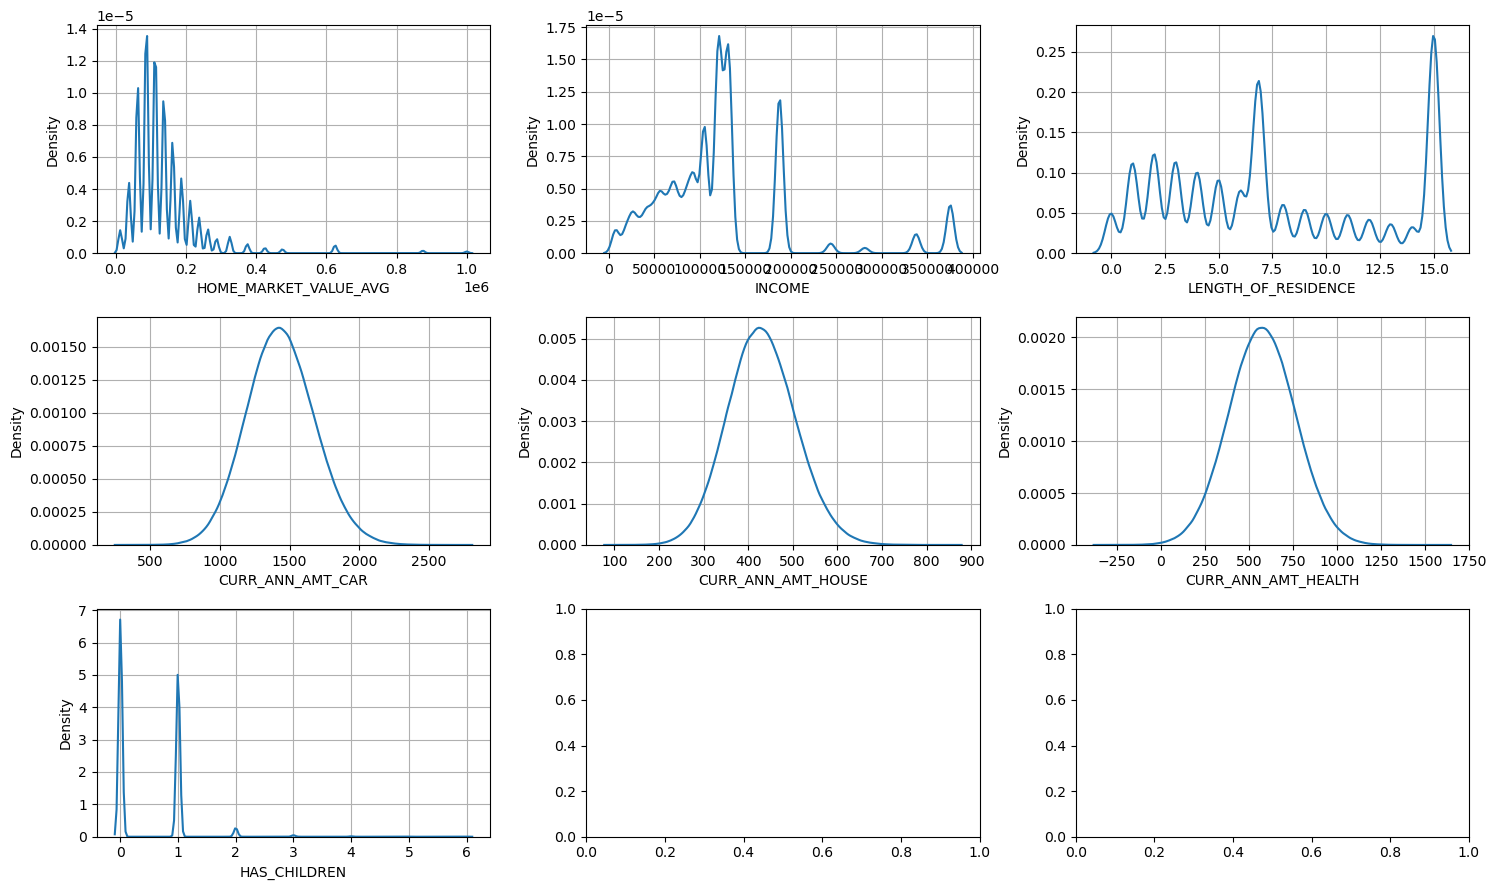

In [28]:
"""
Plotting a series of kernel density plots so each attribute's distribution can be visualized, allowing for an intuitive comparison across different aspects of customer data.
The use of kdeplot for each feature provides insights into the distribution shapes, revealing patterns such as skewness or bimodality.
"""

r = 3
c = 3
# Create a figure and a grid of subplots
fig, axes = plt.subplots(r, c, figsize=(c * 5, r * 3))

# Flatten the array of axes, so that we can iterate over it
axes_flat = axes.flatten()

# List of columns to plot
cols = ["HOME_MARKET_VALUE_AVG", "INCOME", "LENGTH_OF_RESIDENCE", "CURR_ANN_AMT_CAR", "CURR_ANN_AMT_HOUSE", "CURR_ANN_AMT_HEALTH", "HAS_CHILDREN"]

# Plot each column using seaborn's kdeplot on a different subplot
for i, col in enumerate(cols):
    sns.kdeplot(x=df[col], ax=axes_flat[i])
    axes_flat[i].grid()

# Adjust layout to prevent overlapping, then show plot
plt.tight_layout()
plt.show()

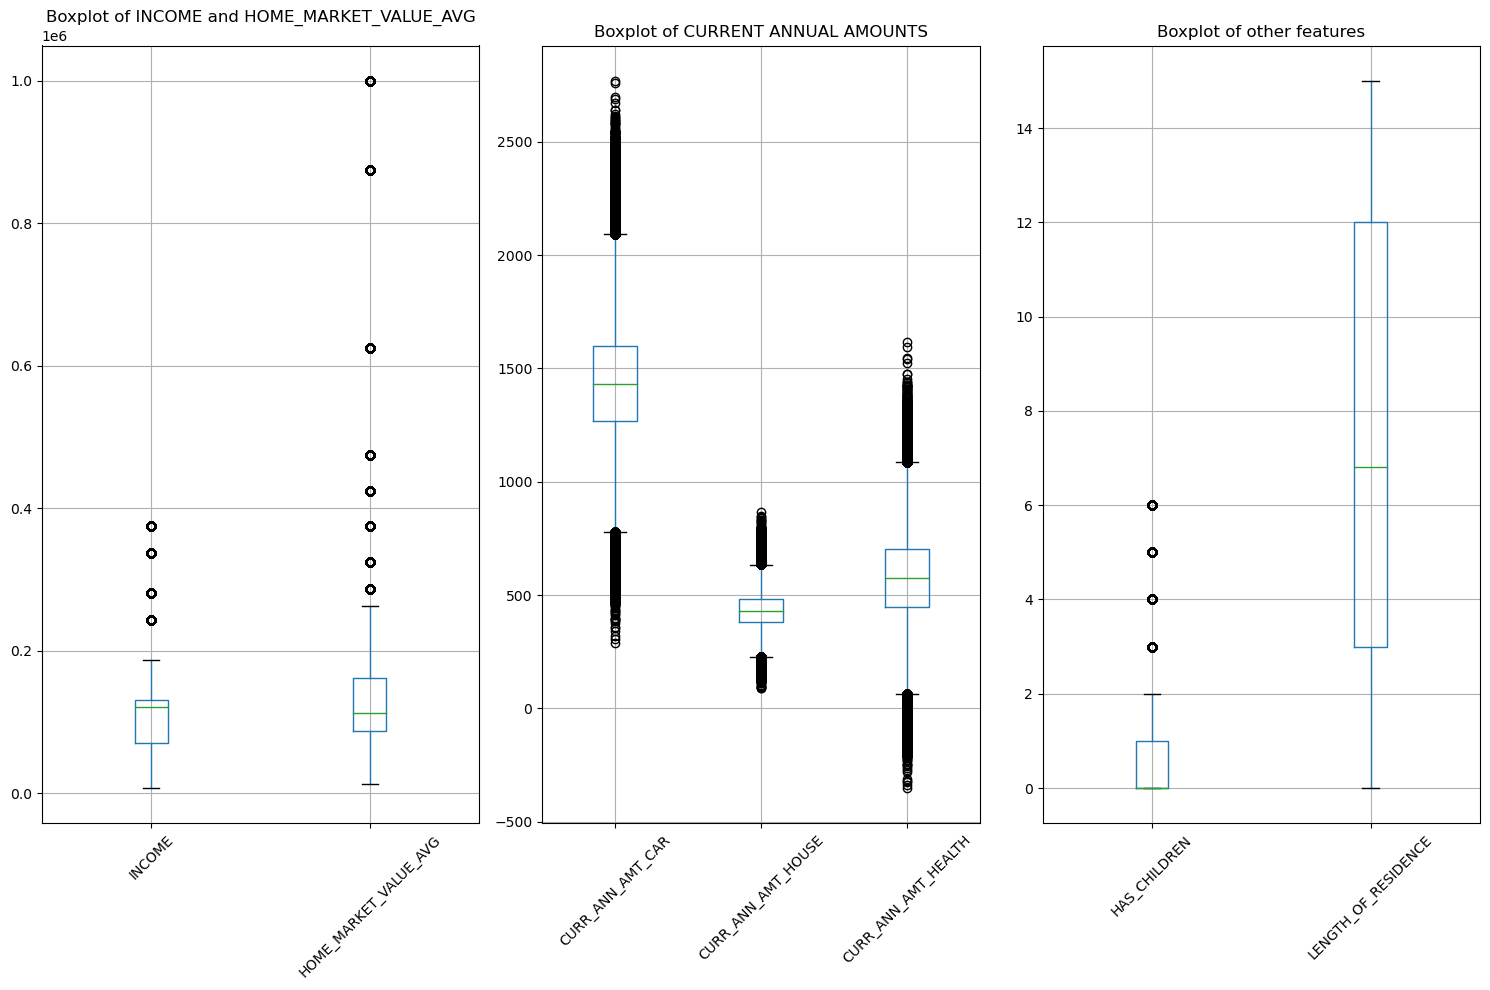

In [29]:
"""
Plotting a series of boxplots, designed to identify outliers and further understand the general distribution of each feature. The visualization is divided into four different
graphs to account for the diverse range of values amoung variables.
"""

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 10))

# First boxplot
df[["INCOME", "HOME_MARKET_VALUE_AVG"]].boxplot(ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  # Rotate x-axis labels for better readability
ax1.set_title("Boxplot of INCOME and HOME_MARKET_VALUE_AVG")

# Second boxplot
df[["CURR_ANN_AMT_CAR", "CURR_ANN_AMT_HOUSE", "CURR_ANN_AMT_HEALTH"]].boxplot(ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45) 
ax2.set_title("Boxplot of CURRENT ANNUAL AMOUNTS")

# Third boxplot
df[["HAS_CHILDREN", "LENGTH_OF_RESIDENCE"]].boxplot(ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)
ax3.set_title("Boxplot of other features")

plt.tight_layout() 
plt.show()

Outliers are present in all variables except "LENGTH_OF_RESIDENCE".
- The reason why "INCOME" and "HOME_MARKET_VALUE" outliers will not be deleted is because as "understanding customer is the job", it is important to also understand the behaviour the the wealthy customer segment. The same logic applies to "HAS_CHILDREN". It is important that the model has the chance to understand the correlations between these features (and potentially their outliers) to understand the diverse customer segments.
- The normal distribution from the three insurnace products are reflected in both the density plot as well as the boxplots and for this reason results in a high degree of outliers. As these three features contain key information about customer spending habits, these outliers will not be removed, except for the negative values for "CURR_ANN_AMT_HEALTH" which present anomalies that do not reflect realistic scenarios. 

In [30]:
# Count amount of values which are negative
len(df.loc[df["CURR_ANN_AMT_HEALTH"] < 0, "CURR_ANN_AMT_HEALTH"])

2259

In [31]:
"""
Dropping the 2259 negative values from CURR_ANN_AMT_HEALTH as they are anomalies that do not reflect realistic scenarios
"""
df = df.loc[df["CURR_ANN_AMT_HEALTH"] >= 0]

<Figure size 1200x600 with 0 Axes>

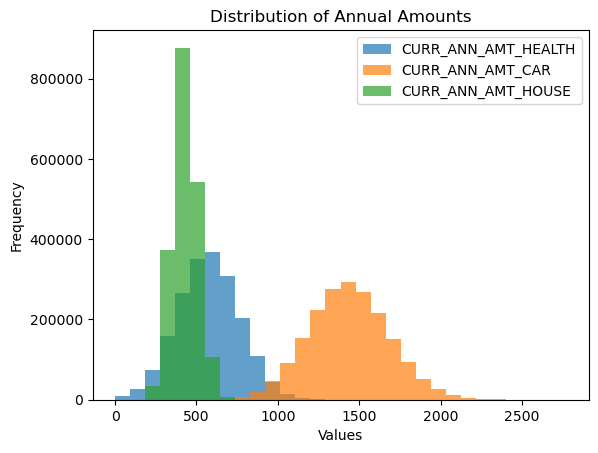

In [32]:
"""
Here the three insurance product spending amounts are plotted on transparent histograms. This allows for overlap comparison, crucial for product development and marketing 
strategy insights as it aids in understanding ABC Insurance's customer preferences.
"""

curr_ann_amt_col = ["CURR_ANN_AMT_HEALTH", "CURR_ANN_AMT_CAR", "CURR_ANN_AMT_HOUSE"]

# Plot histograms for the selected columns
plt.figure(figsize=(12, 6))
df[curr_ann_amt_col].plot(kind="hist", bins=30, alpha=0.7)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of Annual Amounts")
plt.legend(labels=curr_ann_amt_col)
plt.show()

In [33]:
print("The sum of annual payments to CAR insurance is", df["CURR_ANN_AMT_CAR"].sum())
print("The sum of annual payments to HEALTH insurance is", df["CURR_ANN_AMT_HEALTH"].sum())
print("The sum of annual payments to HOUSE insurance is", df["CURR_ANN_AMT_HOUSE"].sum())

The sum of annual payments to CAR insurance is 2787901730.3193192
The sum of annual payments to HEALTH insurance is 1116411011.124996
The sum of annual payments to HOUSE insurance is 836380319


In [34]:
tot = df["CURR_ANN_AMT_CAR"].sum() + df["CURR_ANN_AMT_HEALTH"].sum() + df["CURR_ANN_AMT_HOUSE"].sum()
print("The ratio of annual payments to CAR insurance over total annual payments is", round((df["CURR_ANN_AMT_CAR"].sum()/tot)*100, 2))
print("The ratio of annual payments to HEALTH insurance over total annual payments is", round((df["CURR_ANN_AMT_HEALTH"].sum()/tot)*100, 2))
print("The ratio of annual payments to HOUSE insurance over total annual payments is", round((df["CURR_ANN_AMT_HOUSE"].sum()/tot)*100, 2))

The ratio of annual payments to CAR insurance over total annual payments is 58.81
The ratio of annual payments to HEALTH insurance over total annual payments is 23.55
The ratio of annual payments to HOUSE insurance over total annual payments is 17.64


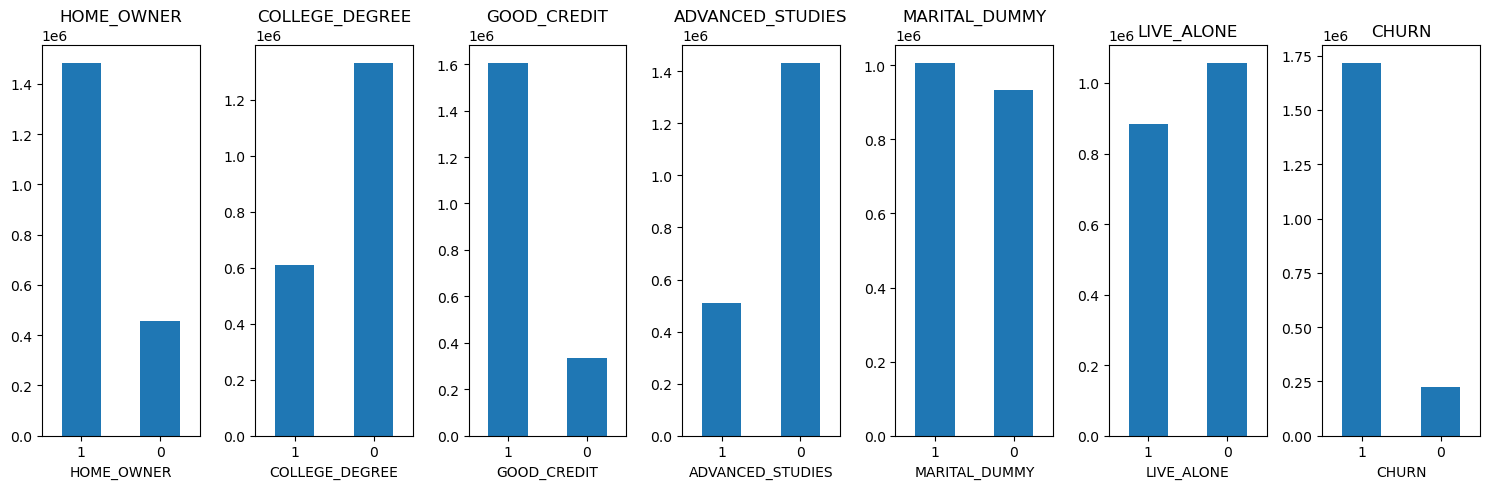

Where (1) implies YES and (0) implies NO


In [35]:
"""
A series of plots showing the distribution of all binary variables. This layout facilitates quick comparison across different/prevailing customer characteristics.
"""

dummy_cols = ["HOME_OWNER", "COLLEGE_DEGREE", "GOOD_CREDIT", "ADVANCED_STUDIES", "MARITAL_DUMMY", "LIVE_ALONE", "CHURN"]

fig, axes = plt.subplots(nrows=1, ncols=len(dummy_cols), figsize=(15, 5))
for i, col in enumerate(dummy_cols):
    value_counts = df[col].value_counts().reindex([1, 0])
    value_counts.plot(kind='bar', ax=axes[i], title=col, rot=0)
plt.tight_layout()
plt.show()

print("Where (1) implies YES and (0) implies NO")

#### Timeliness - Dates

Looking at the next dimension, **Timeliness**, it is important that data is up-to-date to their real-world state for the task in hand.


- The max year for "SUSP_DATE" is 2100 which is due to previous data cleaning methods, however the second largest year is 2026. It is reasonable for a suspension date to be set for a specific year in the future based on the contract of the policy and therefore is reasonable.

In [36]:
"""
Define the columns of interest 
"""

columns_of_interest = ["CUST_ORIG_DATE", "CUST_START_DATE", "SUSPD_DATE", "DATE_OF_BIRTH"]

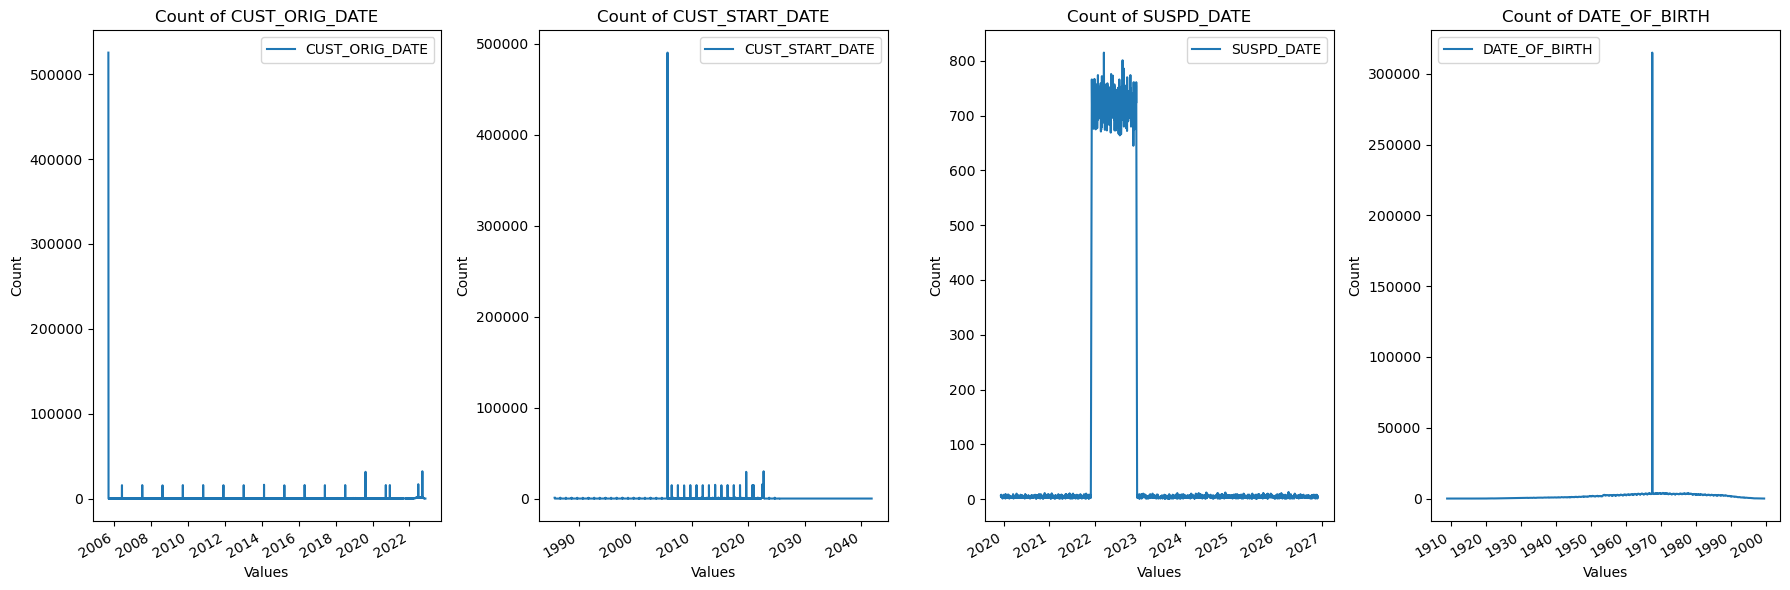

                      CUST_ORIG_DATE                CUST_START_DATE  \
count                        1939279                        1939279   
mean   2013-04-10 21:09:57.712656896  2013-03-29 13:25:59.574460160   
min              2005-09-11 00:00:00            1985-09-16 00:00:00   
25%              2005-09-11 00:00:00            2005-09-11 00:00:00   
50%              2013-03-10 00:00:00            2013-02-27 00:00:00   
75%              2019-05-04 00:00:00            2019-06-29 00:00:00   
max              2022-11-12 00:00:00            2041-10-28 00:00:00   

                       SUSPD_DATE                  DATE_OF_BIRTH  
count                      223517                        1939279  
mean   2022-06-20 10:01:43.562592  1967-04-06 01:19:17.420051504  
min           2019-12-10 00:00:00            1908-12-11 00:00:00  
25%           2022-03-02 00:00:00            1959-12-30 00:00:00  
50%           2022-06-09 00:00:00            1967-07-07 00:00:00  
75%           2022-09-12 00:0

In [37]:
"""
Create a series of plots to see the general distribution over time and if there are any anomalies
"""

# Create subplots for each feature
fig, axes = plt.subplots(nrows=1, ncols=len(columns_of_interest), figsize=(18, 6))

# Plot line chart for each feature
df["CUST_ORIG_DATE"].value_counts().sort_index().plot(ax=axes[0], kind="line")
df["CUST_START_DATE"].value_counts().sort_index().plot(ax=axes[1], kind="line")
df["SUSPD_DATE"].value_counts().sort_index().plot(ax=axes[2], kind="line")
df["DATE_OF_BIRTH"].value_counts().sort_index().plot(ax=axes[3], kind="line")

# Set labels and title for each subplot
for i, col in enumerate(columns_of_interest):
    axes[i].set_xlabel("Values")
    axes[i].set_ylabel("Count")
    axes[i].set_title(f"Count of {col}")
    axes[i].legend([col])

plt.tight_layout()
plt.show()

print(df[columns_of_interest].describe())

In [38]:
"""
Two anomalies about "CUST_START_DATE" can be identified:
1. The original date a customer joins must logically be the same or previous to the start date of the customer's policy (given that the customer may change policy 
in his lifetime), however the min year for "CUST_START_DATE" is 1985 in comparison to cust_orig_date which is 2013. 

2. The max year for "CUST_START_DATE" is 2041, which is unlogical given the assumption that policies cannot be set to start in the future. It is additionally assumed 
that the dataset was last updated the 2022-11-12.
"""

print(round(len(df.loc[df["CUST_START_DATE"]>= most_recent_date])/len(df)*100, 2), "% of rows have a CUST_START_DATE after 2022-11-12")
print(round(len(df.loc[df["CUST_START_DATE"] < df["CUST_ORIG_DATE"].min()]) / len(df) * 100, 2), "% of rows have a CUST_START_DATE before 2005-09-11")

1.7 % of rows have a CUST_START_DATE after 2022-11-12
2.2 % of rows have a CUST_START_DATE before 2005-09-11


In [39]:
"""
Since the amount of "CUST_START_DATE" anomalies is a low 3.92% of the dataset, these values will be deleted to avoid potential biases
"""

df = df.loc[(df["CUST_START_DATE"] >= df["CUST_ORIG_DATE"].min()) & (df["CUST_START_DATE"] < "2022-11-12")]

In [40]:
# Amount of customers suspended in the past years
print(df.loc[(df["SUSPD_DATE"] >= "2022-01-01") & (df["SUSPD_DATE"] < "2023-01-01"), "SUSPD_DATE"].count(), "customers have suspended their policy in 2022 \n")
print(df.loc[(df["SUSPD_DATE"] >= "2021-01-01") & (df["SUSPD_DATE"] < "2022-01-01"), "SUSPD_DATE"].count(), "customers have suspended their policy in 2021 \n")
print(df.loc[(df["SUSPD_DATE"] >= "2020-01-01") & (df["SUSPD_DATE"] < "2021-01-01"), "SUSPD_DATE"].count(), "customers have suspended their policy in 2020 \n")
print(df.loc[(df["SUSPD_DATE"] >= "2019-01-01") & (df["SUSPD_DATE"] < "2020-01-01"), "SUSPD_DATE"].count(), "customers have suspended their policy in 2019")

191578 customers have suspended their policy in 2022 

17082 customers have suspended their policy in 2021 

1212 customers have suspended their policy in 2020 

94 customers have suspended their policy in 2019


In [41]:
"""
"DATE_OF_BIRTH" seems to have a strong anomaly in the data as there is a spike in births in the late 1970s which is highly unplausible
"""

df["DATE_OF_BIRTH"].value_counts(ascending=False)

DATE_OF_BIRTH
1967-07-07    302487
1970-07-26      3826
1967-06-27      3811
1968-06-26      3789
1970-06-25      3783
               ...  
1911-02-08         1
1909-07-10         1
1912-02-08         1
1910-07-10         1
1910-10-10         1
Name: count, Length: 1085, dtype: int64

In [42]:
print(round((df.loc[df["DATE_OF_BIRTH"] == "1967-07-07", "DATE_OF_BIRTH"].count() / len(df))*100, 2), "% of the dataset has the same birthdate (1967-07-07)")

16.23 % of the dataset has the same birthdate (1967-07-07)


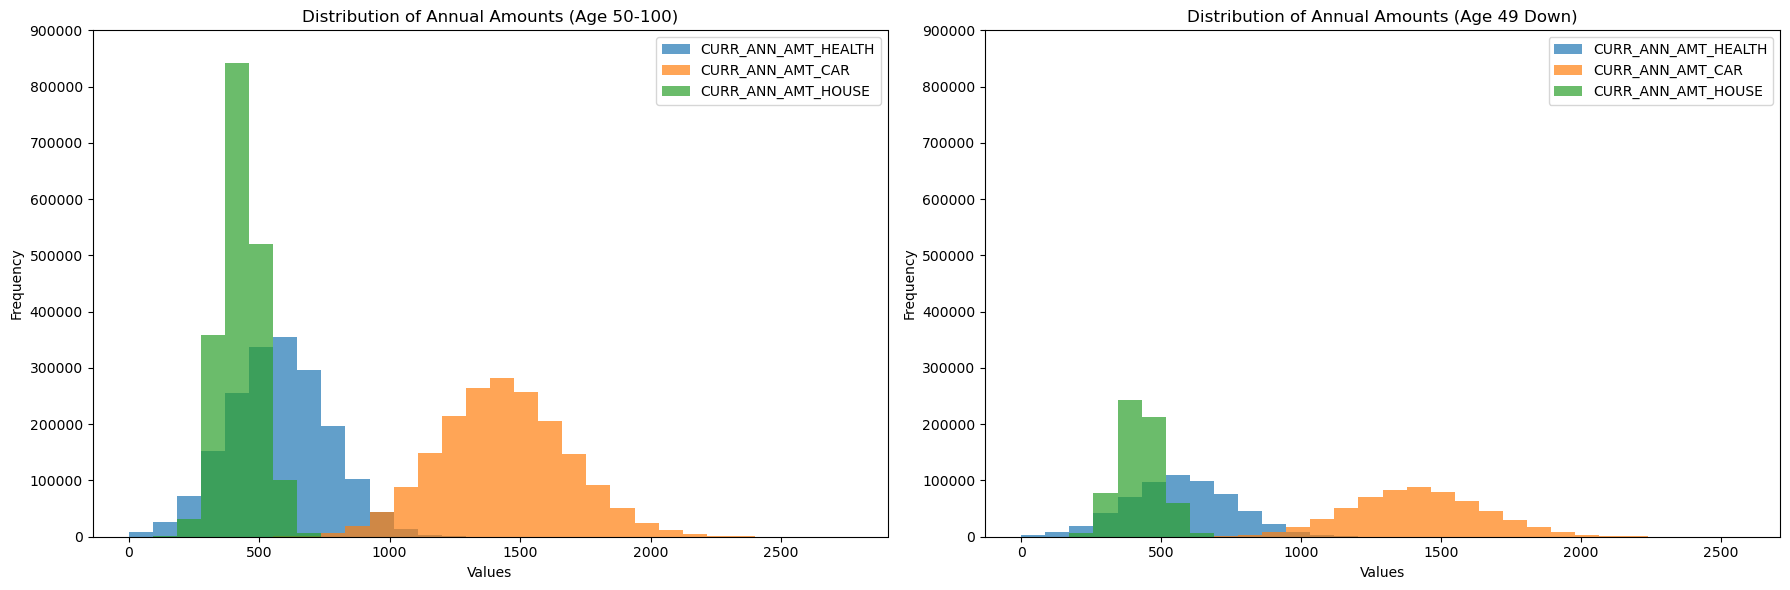

In [43]:
"""
A new variable "AGE" was created to capture how old clients are.
Two line plots comparing the different spending amount between two age groups (0-49 & 50-100) is shown (excluding those customers who are born in 1967-01-07 to avoid the big
sample size biasing the visualization)
"""

df["AGE"] = most_recent_date.year - df["DATE_OF_BIRTH"].dt.year

# Filter data for "AGE" from 40 to 100
df_age_50_to_100 = df[(df["AGE"] >= 50) & (df["AGE"] <= 100) & df["AGE"] != 55]

# Filter data for "AGE" from 39 down
df_age_49_down = df[df["AGE"] < 50]
# Determine the maximum frequency across all histograms
max_freq = 900000

# Create subplots for side-by-side comparison
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot histograms for the selected columns for "AGE" from 50 to 100
df_age_50_to_100[curr_ann_amt_col].plot(kind="hist", bins=30, alpha=0.7, ax=axes[0])
axes[0].set_xlabel("Values")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Distribution of Annual Amounts (Age 50-100)")
axes[0].legend(labels=curr_ann_amt_col)
axes[0].set_ylim(0, max_freq)  # Set the same y-axis limits

# Plot histograms for the selected columns for "AGE" from 49 down
df_age_49_down[curr_ann_amt_col].plot(kind="hist", bins=30, alpha=0.7, ax=axes[1])
axes[1].set_xlabel("Values")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Distribution of Annual Amounts (Age 49 Down)")
axes[1].legend(labels=curr_ann_amt_col)
axes[1].set_ylim(0, max_freq)  # Set the same y-axis limits

plt.tight_layout()
plt.show()


In [44]:
"""
Checking to see if this difference in annual amounts is due to the age group or to the amount of +50 customers in comparison to under 50.
"""

print(len(df_age_50_to_100))
print(len(df_age_49_down))

1863615
605458


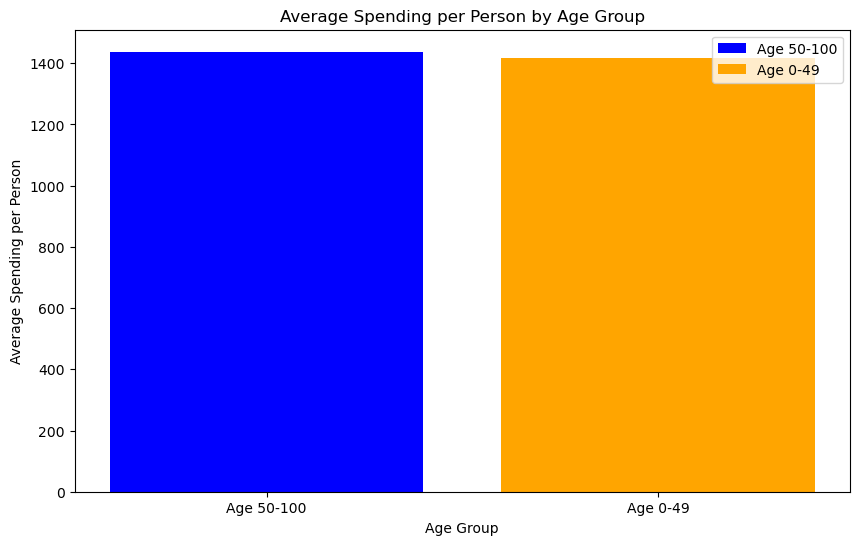

In [45]:
# Calculate average spending per person for age group 50-100
avg_spending_50_to_100 = df_age_50_to_100[curr_ann_amt_col].sum() / len(df_age_50_to_100)

# Calculate average spending per person for age group 0-49
avg_spending_49_down = df_age_49_down[curr_ann_amt_col].sum() / len(df_age_49_down)

# Plotting
plt.figure(figsize=(10, 6))

# Plotting average spending per person for age group 50-100
plt.bar("Age 50-100", avg_spending_50_to_100, color='blue', label='Age 50-100')

# Plotting average spending per person for age group 0-49
plt.bar("Age 0-49", avg_spending_49_down, color='orange', label='Age 0-49')

plt.xlabel("Age Group")
plt.ylabel("Average Spending per Person")
plt.title("Average Spending per Person by Age Group")
plt.legend()
plt.show()


In [46]:
"""
These histograms show that AGE is an important variable as it has a strong impact on the annual spending in the various insurance products. Due to this importance, the 
16.23 % values equal to 1967-07-07 in "DATE_OF_BIRTH" will be deleted through Listwise Deletion to avoid the introduction of bias.
"""

df = df.loc[df["DATE_OF_BIRTH"] != "1967-07-07"]

In [47]:
"""
Checking for the amount of rows which have AGE above 90 and do not have a suspension date
"""

print(len(df.loc[(df["AGE"] >= 90) & (df["CHURN"] == 0)]), "rows have AGE > 90 and no suspension date")

2898 rows have AGE > 90 and no suspension date


In [48]:
"""
Adjusting for those people who are likely no longer alive is critical for maintaining data relevance and accuracy. Based on the general assumption that the 
average life expectancy is 90 (cannot be more specific due to a lack of information regarding the customer's demographics), those rows who have "AGE" bigger than 90 will be 
deleted. Several reasons justify this:
- To take into account the assumption that the policies and pricing strategies of 90 years ago were drastically different than those of today.
- 2425 rows have "AGE" > 90 and have no suspension date (or "CHURN" = 0), which implies that there are data quality issues concerning these rows.
- As there are still many customers who represent the older generation ("AGE" between 65 and 90), the model will still have the ability to capture any potentially relevant 
insight concerning this age group.
"""

print(len(df.loc[df["AGE"] >= 90]), "rows will be deleted")

df = df.loc[df["AGE"] < 90]

print(len(df.loc[(df["AGE"]<  90) & (df["AGE"]>60)]), "rows represent the older generation customer group (aged from 90 to 60)")

36818 rows will be deleted
493375 rows represent the older generation customer group (aged from 90 to 60)


C:\Users\julia\AppData\Local\Temp\ipykernel_16296\3782284422.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_age_group = df.groupby("AGE_GROUP")["CHURN"].mean()
C:\Users\julia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\julia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\julia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_n

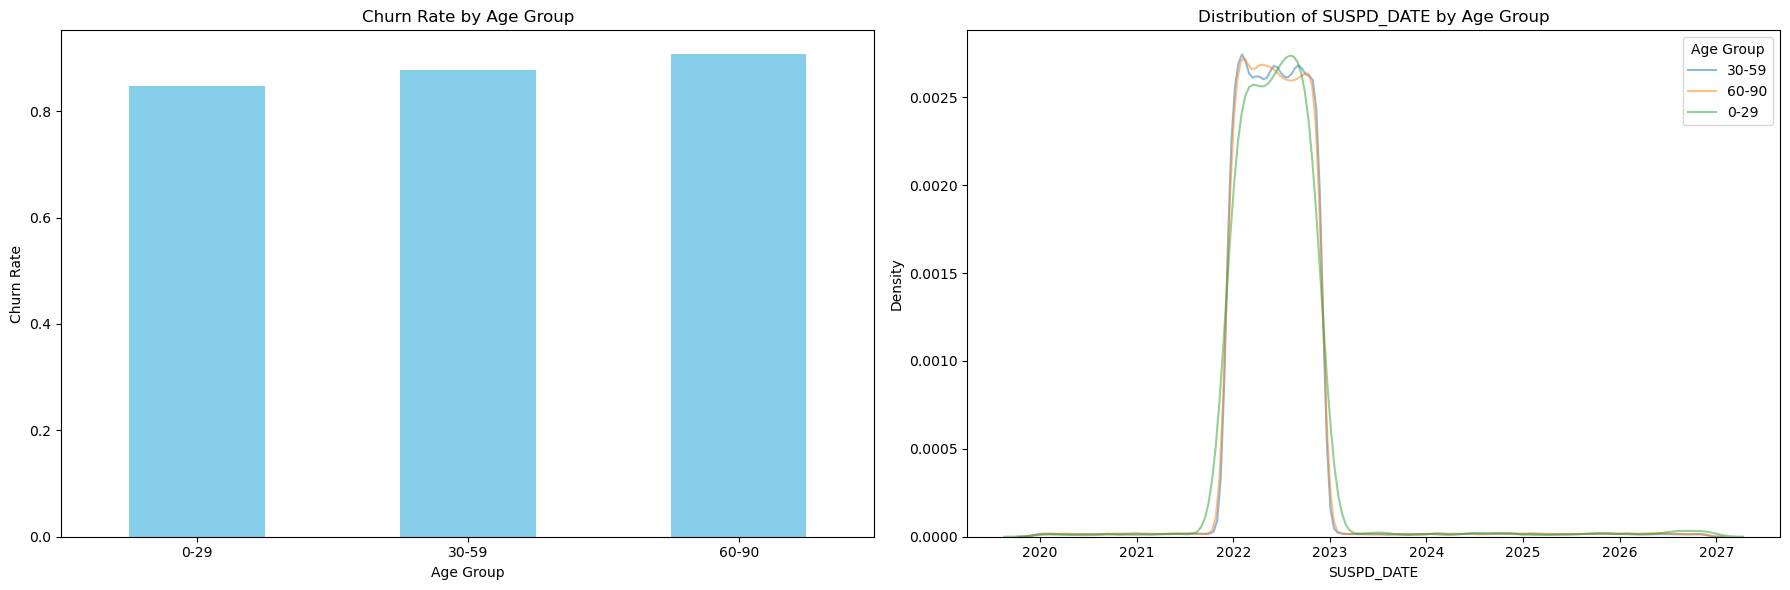

In [49]:
""" 
Create a series of plots for the macro age groups to see if there is different trend on the amount of customers suspending their policies and age. This may help understand 
which customer group is at the fault of these increasing churn rates
"""

# Create age groups
df["AGE_GROUP"] = pd.cut(df["AGE"], bins=[0, 29, 59, 90], labels=["0-29", "30-59", "60-90"], right=False)

# Calculate churn rate by age group
churn_rate_by_age_group = df.groupby("AGE_GROUP")["CHURN"].mean()

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot churn rate by age group
churn_rate_by_age_group.plot(kind="bar", color="skyblue", ax=axes[0])
axes[0].set_title("Churn Rate by Age Group")
axes[0].set_xlabel("Age Group")
axes[0].set_ylabel("Churn Rate")
axes[0].tick_params(axis="x", rotation=0)  # Keep the labels on the x-axis vertical for readability

# Plot KDE plots for SUSPD_DATE by age group
for age_group in df["AGE_GROUP"].unique():
    sns.kdeplot(df.loc[df["AGE_GROUP"] == age_group, "SUSPD_DATE"], ax=axes[1], label=age_group, alpha=0.5)

# Add labels and title for KDE plots
axes[1].set_title("Distribution of SUSPD_DATE by Age Group")
axes[1].set_xlabel("SUSPD_DATE")
axes[1].set_ylabel("Density")
axes[1].legend(title="Age Group")

# Show plots
plt.tight_layout()
plt.show()

In [50]:
df["CUST_ORIG_DATE"].max()

Timestamp('2022-11-11 00:00:00')

In [51]:
"""
Adding feature for amount of days customer has been with insurance agency using the orig_date and the suspd_date. In the case of the customer still being a client, the assumed
last date of update is the 2022-11-12. This assumption is based on the assumption that at least one customer signs up to the company per day, and the latest "CUST_ORIG_DATE" is on the 2022-11-12.
"""

most_recent_date = pd.to_datetime("2022-11-12")

tenure_where_notnull = (df['SUSPD_DATE'] - df['CUST_ORIG_DATE']).dt.days
tenure_where_null = (most_recent_date - df['CUST_ORIG_DATE']).dt.days

df["TENURE_DAYS"] = tenure_where_notnull.fillna(tenure_where_null)

len(df.loc[df["TENURE_DAYS"]<=0])

48378

In [52]:
"""
48378 rows have negatives values in TENURE_DAYS. With further investigation this is found to be because in 48378 cases, the suspension date is earlier than the origin date which is impossible.
"""

# Create a boolean mask for rows where SUSPD_DATE is before CUST_ORIG_DATE
len(df.loc[df['SUSPD_DATE'] <= df['CUST_ORIG_DATE']]) / len(df)

0.03173763866929955

In [53]:
"""
Since these rows represent only 3.17% of the database they will be deleted in order to avoid any potential introduction of bias into the model
"""
df = df.loc[df["TENURE_DAYS"] > 0]

In [54]:
"""
Changing the rest of the date-format variables into years for easier comparison to other features 
"""

df["CUST_ORIG_YEARS"] = most_recent_date.year - df["CUST_ORIG_DATE"].dt.year
df["CUST_START_YEARS"] = most_recent_date.year - df["CUST_START_DATE"].dt.year

In [55]:
"""
Drop unnecessary columns as new variables capture their essence in a more practical format
"""

df.drop(["CUST_ORIG_DATE", "CUST_START_DATE", "DATE_OF_BIRTH", "SUSPD_DATE", "AGE_GROUP"], axis=1, inplace=True)

#### Uniqueness - Duplicates

The next dimension to assess is **Uniqueness**. Duplicate records can lead to skewed analyses and decision-making processes by artificially inflating certain metrics, which in turn may result in inefficient allocation of resources and misguided strategic directions for the business.Duplicate records can lead to skewed analyses and decision-making processes by artificially inflating certain metrics, which in turn may result in inefficient allocation of resources and misguided strategic directions for the business.

In [56]:
"""
Preliminary check for duplicates
"""

value_count = df["INDIVIDUAL_ID"].value_counts()
value_count[value_count > 1].sum()

30294

In [57]:
# Check to see if an example duplicate has different values
df[df["INDIVIDUAL_ID"]=="221301710451.0"]

,INDIVIDUAL_ID,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES,HOME_MARKET_VALUE_AVG,MARITAL_DUMMY,CHURN,LIVE_ALONE,TENURE_DAYS,AGE,CUST_ORIG_YEARS,CUST_START_YEARS
914159,221301710451.0,1290.513803,139.075733,346,187500.0,1,8.0,1.0,0.0,1.0,1,212499.5,0,1,1,6271.0,43,17,17
2300642,221301710451.0,1290.513803,288.227455,407,187500.0,1,8.0,1.0,0.0,1.0,1,212499.5,0,1,1,6271.0,43,17,17


In [58]:
"""
It is found that there are 30294 duplicate rows with the same unique identifier ("INDIVIDUAL_ID"). Instead of directly deleting the duplicate rows, a check was made to check 
whether the rows are the exact same. It is seen that the value for "CURR_ANN_AMT_HEALTH" and "CURR_ANN_AMT_HOUSE" are different. Given that there is no other differentiator 
which states which of the rows is the most up-to-date or gives some information regarding this difference, the assumption was taken that the second row was added later to the dataset. 
Therefore, keep = "last" was added to the code when the duplicates were deleted.
"""

df.drop_duplicates(["INDIVIDUAL_ID"], keep = "last", inplace = True)

In [59]:
"""
Since the unique identifier has accomplished its roll to merge the three datasets and to check for duplicates, now the column "INDIVIDUAL_ID" can be dropped as it plays 
no further roll.
"""

df.drop(["INDIVIDUAL_ID"], axis=1, inplace=True)

#### Feature Engineering

#### Feature Correlation & Standirdation

In [60]:
df.columns

Index(['CURR_ANN_AMT_CAR', 'CURR_ANN_AMT_HEALTH', 'CURR_ANN_AMT_HOUSE',
       'INCOME', 'HAS_CHILDREN', 'LENGTH_OF_RESIDENCE', 'HOME_OWNER',
       'COLLEGE_DEGREE', 'GOOD_CREDIT', 'ADVANCED_STUDIES',
       'HOME_MARKET_VALUE_AVG', 'MARITAL_DUMMY', 'CHURN', 'LIVE_ALONE',
       'TENURE_DAYS', 'AGE', 'CUST_ORIG_YEARS', 'CUST_START_YEARS'],
      dtype='object')

In [61]:
df.head()

,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES,HOME_MARKET_VALUE_AVG,MARITAL_DUMMY,CHURN,LIVE_ALONE,TENURE_DAYS,AGE,CUST_ORIG_YEARS,CUST_START_YEARS
0,1318.877997,517.999317,411,33750.0,2,15.0,1.0,1.0,1.0,0,62499.5,1,1,0,1434.0,44,4,4
1,1474.199182,558.417779,414,41250.0,0,2.0,1.0,0.0,0.0,0,62499.5,0,1,1,1775.0,72,4,4
4,1284.633494,772.857222,366,131250.0,1,4.0,1.0,1.0,1.0,1,237499.5,1,1,1,5876.0,50,16,16
5,1409.916163,774.163467,408,78750.0,0,2.0,1.0,0.0,1.0,0,137499.5,1,1,1,464.0,32,1,1
6,1584.048271,892.956398,510,187500.0,1,8.0,1.0,0.0,1.0,1,112499.5,1,1,0,2876.0,70,8,8


In [62]:
"""
Standirdizing all those features which are not already in binary format to ensure that each feature contributes equally to the analysis. This process converts their values 
to a common scale with a mean of 0 and a standard deviation of 1.  
It was decided to standirdize rather than normalize features since the min-max value of all variables are not known. Standirdization allows to not have to rely on assumptions 
about the data distribution or the knowledge of the range of values.
"""

# Initialize and apply the StandardScaler on a new df
scaler = StandardScaler()

cols_standardize = ["CURR_ANN_AMT_CAR", "CURR_ANN_AMT_HEALTH", "CURR_ANN_AMT_HOUSE", "CUST_ORIG_YEARS", "CUST_START_YEARS", "TENURE_DAYS", "LENGTH_OF_RESIDENCE", "HOME_MARKET_VALUE_AVG", "INCOME", "AGE", "HAS_CHILDREN"]

# Standardize and create a new DataFrame with the same index as the original df
df_stand = pd.DataFrame(scaler.fit_transform(df[cols_standardize]), columns=cols_standardize, index=df.index)

# Add all features back into one dataframe
df_standardized = df.copy()
df_standardized[cols_standardize] = df_stand

# Reorder columns
col_reorder = ["CURR_ANN_AMT_CAR", "CURR_ANN_AMT_HEALTH", "CURR_ANN_AMT_HOUSE", "CUST_ORIG_YEARS", "CUST_START_YEARS", "CHURN", "TENURE_DAYS", "LENGTH_OF_RESIDENCE", "HOME_OWNER", "LIVE_ALONE", "HOME_MARKET_VALUE_AVG", "INCOME", "GOOD_CREDIT", "AGE", "MARITAL_DUMMY", "HAS_CHILDREN", "COLLEGE_DEGREE", "ADVANCED_STUDIES"]
df_standardized = df_standardized[col_reorder]
df_standardized.head()


,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,CUST_ORIG_YEARS,CUST_START_YEARS,CHURN,TENURE_DAYS,LENGTH_OF_RESIDENCE,HOME_OWNER,LIVE_ALONE,HOME_MARKET_VALUE_AVG,INCOME,GOOD_CREDIT,AGE,MARITAL_DUMMY,HAS_CHILDREN,COLLEGE_DEGREE,ADVANCED_STUDIES
0,-0.504995,-0.316633,-0.286445,-0.926729,-0.923207,1,-0.993541,1.452986,1.0,0,-0.780870,-1.142109,1.0,-0.749624,1,2.478275,1.0,0
1,0.125673,-0.102985,-0.247361,-0.926729,-0.923207,1,-0.845232,-1.170203,1.0,1,-0.780870,-1.047909,0.0,1.229045,0,-0.882556,0.0,0
4,-0.644042,1.030524,-0.872696,0.957170,0.970334,1,0.938390,-0.766635,1.0,1,1.141180,0.082489,1.0,-0.325623,1,0.797859,1.0,1
5,-0.135343,1.037428,-0.325528,-1.397703,-1.396592,1,-1.415418,-1.170203,1.0,1,0.042866,-0.576910,1.0,-1.597625,1,-0.882556,0.0,0
6,0.571705,1.665358,1.003309,-0.298763,-0.292027,1,-0.366381,0.040500,1.0,0,-0.231713,0.788989,1.0,1.087712,1,0.797859,0.0,1


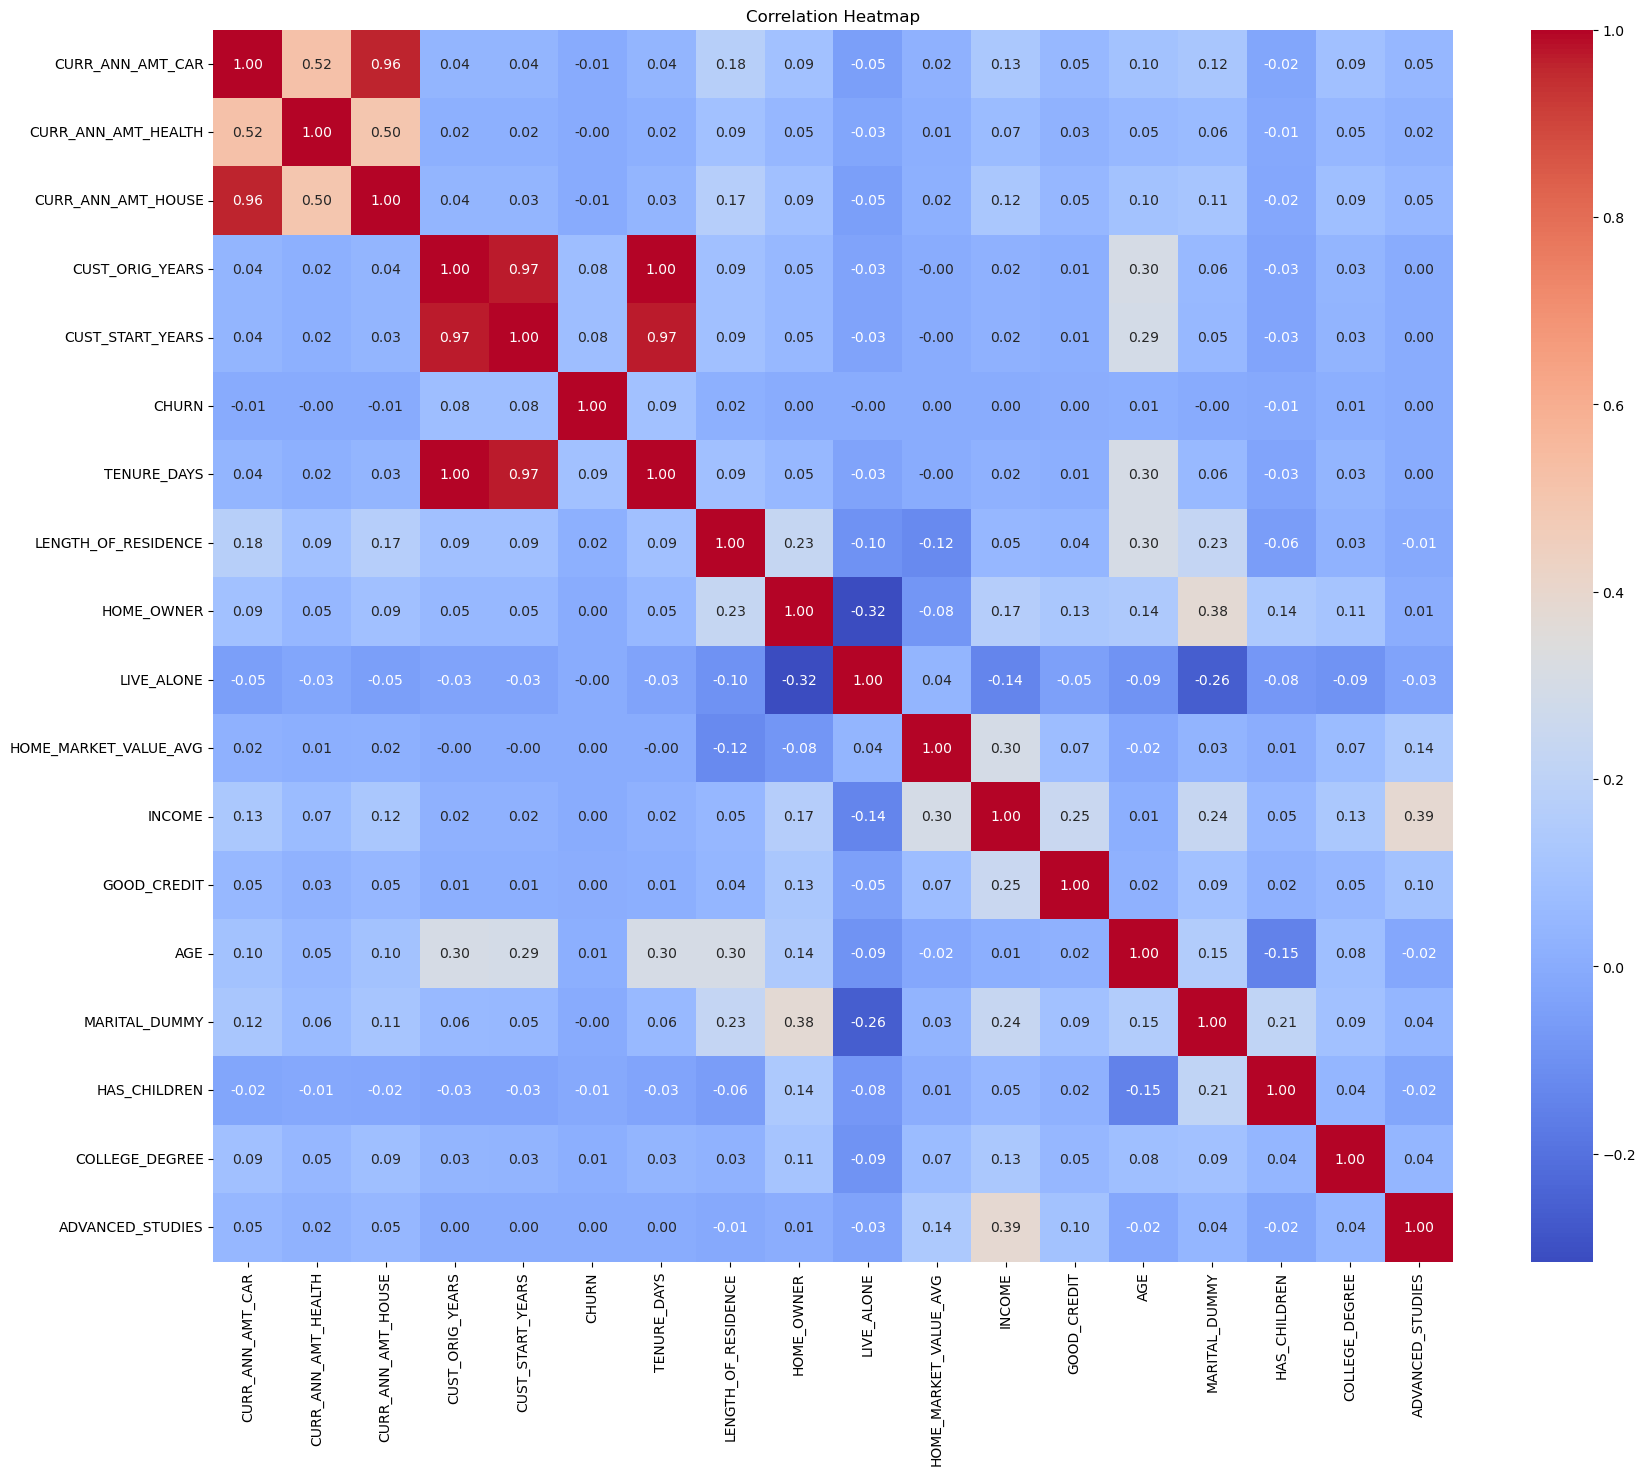

In [63]:
corr = df_standardized.corr()

# Create heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

No particulalry strong correlations are found in the data:
- High positive correlation between the annual amounts spent on the three insurance products suggest that customer who tend to spend more in one product also tend to spend more in the others. This correlation is stronger between the amount spent for car-related and house-related expenses (0.96) in comparison to health expenses (0.52 and 0.50)

- HOME_MARKET_VALUE_AVG is somewhat correlated with INCOME (0.30), which could mean that higher-income customers tend to have homes with higher market values, which is logical.

- As seen before, AGE shows no correlation with CHURN, indicating that the customer's age may not be a strong predictor of churn in this dataset.

- Most dummy variables (HOME_OWNER, MARITAL_DUMMY, HAS_CHILDREN, COLLEGE_DEGREE, ADVANCED_STUDIES) do not show strong correlations with other variables, suggesting that they are distinct, independent factors in this dataset. The only significant correlations are:
> HOME_OWNER has a 0.38 correlation with MARITAL_DUMMY. This implies that if a customer is married they have a high chance of also owning a home. This is supported with the negative correlation between LIVE_ALONE and MARITAL_DUMMY of -0.26


#### Q1.2 Please describe in two paragraphs the main data insights. Connect the insight with the business  (10 points)


In analyzing ABC Insurance's current data management and analytical processes, several key insights emerge with direct implications for business strategy and operational efficiency. 

The identification of missing values and inconsistencies in data entry underscores the critical need for enhancing data accuracy and completeness. This is particularly vital in the insurance industry, where comprehensive customer profiles form the basis for personalized policy offerings and risk assessment. **Implementing training for employees** on accurate data entry and emphasizing the importance of capturing every customer interaction can significantly improve the quality of the dataset. Moreover, the suggestion to refine data collection by ensuring direct entry of exact values rather than ranges, such as home market value, and standardizing data formats (e.g., using binary indicators instead of textual representations for categorical variables) can streamline data processing and analysis, facilitating more informed decision-making. Additionally, given the notably low correlations observed between existing features, it's imperative for ABC Insurance to concentrate on **enhancing the current feature set or incorporating new ones that exhibit stronger relationships.** This is crucial for uncovering more meaningful insights and patterns within the data. By doing so, ABC Insurance can develop more accurate and effective predictive models, enabling targeted strategies for customer engagement, retention, and acquisition, ultimately driving more informed business decisions.

From a business perspective, the analysis of annual spending across different insurance products reveals that car insurance yields the highest returns, followed by health and house insurance. This insight is invaluable for ABC Insurance, and could potentially lead to suggesting a **strategic reallocation of marketing and product development efforts towards car insurance** given the higher profitability, considering it accounts for 58.81% of the total annual payments. The demographic analysis gives insights into the average customer, such as there a substantial portion without higher education or that the majority owns a house. ABC should consider **developing customer profiles** based on specific customer characteristics to improve targeted marketing and personalised pricing stratgies. This will allow marketing to focus on profitable customer segments rather than the approach one-fits-all, with the aim to broaden the appeal of insurance products. Furthermore, the alarming increase in policy suspensions highlights the urgency of addressing customer churn. Investigating the underlying **potential causes and patterns which lead of churn** (such as competitors offering more competitive and attractive prices, product offerings, or service quality) can guide strategic adjustments in terms of **retention strategies**. Additionally, the segmentation of spending by age group not only underscores the dominance of the +50s segment in current revenue but also signals the **strategic necessity of prioritizing engagement with younger generations to ensure long-term viability and growth**. Addressing these insights by refining data management practices, focusing on lucrative insurance products, and tailoring strategies to diverse and younger segments can enhance ABC Insurance's market positioning and customer retention in a competitive landscape.

## Question 2: Predictive Modeling estimate Costumer Value (35 points)

#### Background: ABC Insurance aims to optimize its marketing and product offerings by predicting which customers are likely to be the most valuable. The CURR_ANN_AMT_CAR, CURR_ANN_AMT_HEALTH, and CURR_ANN_AMT_HOUSE fields in the df_customer dataset can serve as indicators of customer value.

#### Q2.1 Build a baseline model to estimate the customer value based on their characteristics. (15 points)

The three features, CURR_ANN_AMT_CAR, CURR_ANN_AMT_HEALTH, and CURR_ANN_AMT_HOUSE, will be used as **target variables**. As we have seen in the correlation matrix, as a customer pays more in one insurance product they also tend to pay more in the others; therefore, the target variable will be a sum of these three products to represent the overall customer value. However, since the degree of correlation amoung the products ranges from 0.52 to 0.96, these three indicators could also be looked at seperately. In future analysis this could be taken into consideration and a seperate model and feature selection could be done for each product.

In [64]:
# Copy the df for Q2 Feature Engineering
df_a = df_standardized

# Add the three target variables together to have only one
df_a["CURR_ANN_AMT"] = df_a["CURR_ANN_AMT_CAR"] + df_a["CURR_ANN_AMT_HEALTH"] + df_a["CURR_ANN_AMT_HOUSE"]

##### Feature Selection

Feature Selection is starting with **15 features** (excluding the three target variables).

Feature selection is crucial as it reduces overfitting by eliminating redundant data, improves model accuracy by removing misleading information, and cuts down training time by simplifying algorithm complexity. To prevent data leakage, target variable columns—CURR_ANN_AMT_CAR, CURR_ANN_AMT_HEALTH, and CURR_ANN_AMT_HOUSE—have been excluded, ensuring the model's predictive integrity.

An initial feature selection brainstorm based solely on domain knowledge would suggest that the following features have the biggest impact on the target variables (10/15 features selected):
- "INCOME" : Higher income may correlate with higher insurance spending, as customers can afford more comprehensive coverage.
- "HOME_OWNER" : Homeowners are likely to invest in house insurance and possibly have different health and car insurance needs compared to renters.
- "HOME_MARKET_VALUE_AVG" : Higher home values may lead to higher house insurance investments due to the need for more coverage.
- "LIVE_ALONE" : Living arrangements might affect the types and amounts of insurance a customer deems necessary.
- "LENGTH_OF_RESIDENCE" : Longer residence may indicate stability, potentially influencing house insurance investment.
- "HAS_CHILDREN" : Customers with children might invest more in health and house insurance for added security.
- "GOOD_CREDIT" : Indicates financial reliability, which could influence the terms and amounts of insurance investments.
- "CHURN" : Understanding how churn relates to investment in insurance products can offer insights into customer satisfaction and product value.
- "TENURE_DAYS" : Customer tenure with the insurance company might influence loyalty discounts or willingness to invest in additional products.
- "AGE" : Age can significantly impact insurance needs and spending, especially for health insurance.


For simplicity, the feature selection will be the same amoung the three target variables. However, in future analysis it can be considered to be done seperately given that the features which influence one insurance product may be different to those which influence another insurnace product.

In [65]:
df_a.head()

,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,CUST_ORIG_YEARS,CUST_START_YEARS,CHURN,TENURE_DAYS,LENGTH_OF_RESIDENCE,HOME_OWNER,LIVE_ALONE,HOME_MARKET_VALUE_AVG,INCOME,GOOD_CREDIT,AGE,MARITAL_DUMMY,HAS_CHILDREN,COLLEGE_DEGREE,ADVANCED_STUDIES,CURR_ANN_AMT
0,-0.504995,-0.316633,-0.286445,-0.926729,-0.923207,1,-0.993541,1.452986,1.0,0,-0.780870,-1.142109,1.0,-0.749624,1,2.478275,1.0,0,-1.108073
1,0.125673,-0.102985,-0.247361,-0.926729,-0.923207,1,-0.845232,-1.170203,1.0,1,-0.780870,-1.047909,0.0,1.229045,0,-0.882556,0.0,0,-0.224673
4,-0.644042,1.030524,-0.872696,0.957170,0.970334,1,0.938390,-0.766635,1.0,1,1.141180,0.082489,1.0,-0.325623,1,0.797859,1.0,1,-0.486215
5,-0.135343,1.037428,-0.325528,-1.397703,-1.396592,1,-1.415418,-1.170203,1.0,1,0.042866,-0.576910,1.0,-1.597625,1,-0.882556,0.0,0,0.576558
6,0.571705,1.665358,1.003309,-0.298763,-0.292027,1,-0.366381,0.040500,1.0,0,-0.231713,0.788989,1.0,1.087712,1,0.797859,0.0,1,3.240372


In [66]:
# Prepare features (X) and target (Y)
X = df_a.drop(["CURR_ANN_AMT", "CURR_ANN_AMT_CAR", "CURR_ANN_AMT_HEALTH", "CURR_ANN_AMT_HOUSE"], axis=1)

Y = df_a["CURR_ANN_AMT"]

Feature: CUST_ORIG_YEARS, Score: 1744.5102536468369
Feature: CUST_START_YEARS, Score: 1631.2457269966317
Feature: CHURN, Score: 57.07493362345401
Feature: TENURE_DAYS, Score: 1642.8370549592485
Feature: LENGTH_OF_RESIDENCE, Score: 41145.40437438083
Feature: HOME_OWNER, Score: 11431.89275198389
Feature: LIVE_ALONE, Score: 3611.027589758864
Feature: HOME_MARKET_VALUE_AVG, Score: 475.02531126980284
Feature: INCOME, Score: 21675.04143689989
Feature: GOOD_CREDIT, Score: 3323.8265089528463
Feature: AGE, Score: 12970.674090863024
Feature: MARITAL_DUMMY, Score: 18379.750295121983
Feature: HAS_CHILDREN, Score: 669.9331945215048
Feature: COLLEGE_DEGREE, Score: 10273.39087696701
Feature: ADVANCED_STUDIES, Score: 2928.3971588739573


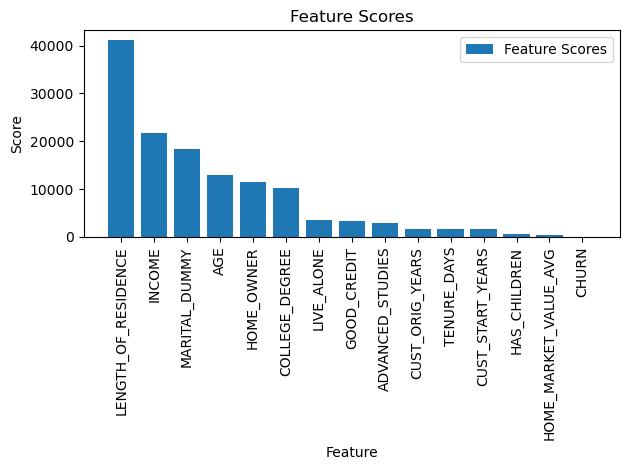


Selected Features:
CUST_ORIG_YEARS
LENGTH_OF_RESIDENCE
HOME_OWNER
LIVE_ALONE
INCOME
GOOD_CREDIT
AGE
MARITAL_DUMMY
COLLEGE_DEGREE
ADVANCED_STUDIES


In [67]:
"""
A feature selection process using SelectKBest with f_regression, targeting the top 10 features to enhance model performance. This method was choosen because, other than being effective in regression models, it 
identifies the features with the strongest statistical relationship to the target variable, improving model accuracy and efficiency by focusing on the most relevant predictors.
The insurance amount columns were excluded to avoid potential data leakage.
"""

# SelectKBest with f_regression for regressionw, select top 10 features
f_reg_selector = SelectKBest(f_regression, k=10)
X_kbest_f_reg = f_reg_selector.fit_transform(X, Y)

# Get the scores of all features
feature_scores = f_reg_selector.scores_

# Get the names of the selected features and their allocation: True for selected, False for not selected
selected_features = df_a.drop(["CURR_ANN_AMT", "CURR_ANN_AMT_CAR", "CURR_ANN_AMT_HEALTH", "CURR_ANN_AMT_HOUSE"], axis = 1).columns[f_reg_selector.get_support()]

# Print the scores and features
for feature, score in zip(df_a.drop(["CURR_ANN_AMT", "CURR_ANN_AMT_CAR", "CURR_ANN_AMT_HEALTH", "CURR_ANN_AMT_HOUSE"], axis = 1).columns, feature_scores):
    print(f"Feature: {feature}, Score: {score}")

# Create DF with feature and corresponding score and sort in descending order
feature_scores_df = pd.DataFrame({"Feature": df_a.drop(["CURR_ANN_AMT", "CURR_ANN_AMT_CAR", "CURR_ANN_AMT_HEALTH", "CURR_ANN_AMT_HOUSE"], axis=1).columns, "Score": feature_scores})
feature_scores_df = feature_scores_df.sort_values(by="Score", ascending=False)

# Plot sorted feature scores
plt.bar(feature_scores_df["Feature"], feature_scores_df["Score"], label="Feature Scores")
plt.xlabel("Feature")
plt.ylabel("Score")
plt.title("Feature Scores")
plt.legend()
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()
    
print("\nSelected Features:")
for feature in selected_features:
    print(feature)

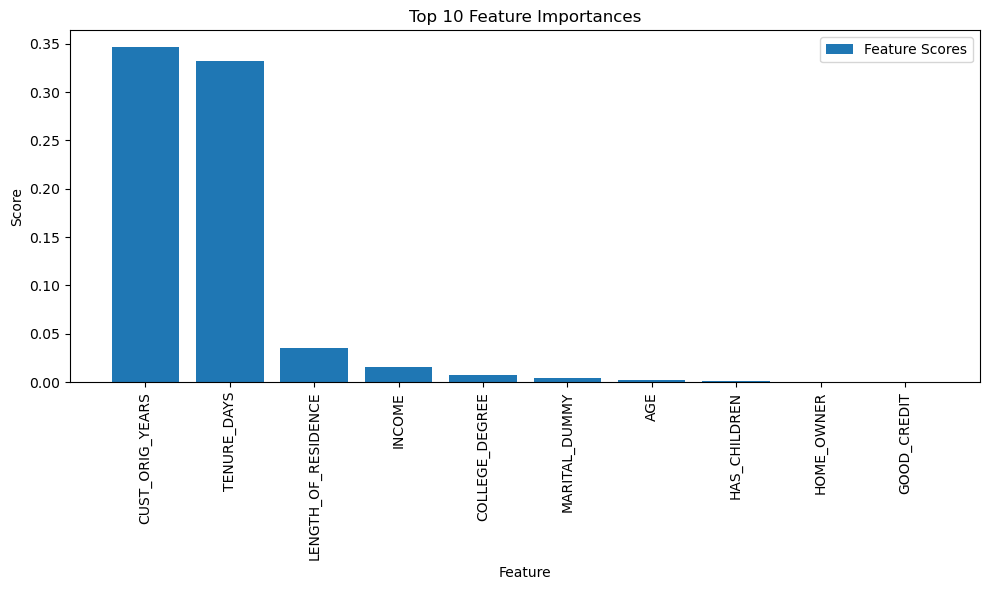

                     importance
CUST_ORIG_YEARS        0.346639
TENURE_DAYS            0.332108
LENGTH_OF_RESIDENCE    0.035507
INCOME                 0.015486
COLLEGE_DEGREE         0.007172
MARITAL_DUMMY          0.004678
AGE                    0.002025
HAS_CHILDREN           0.001565
HOME_OWNER             0.000487
GOOD_CREDIT            0.000186


In [68]:
"""
Permutation importance estimates the importance of features by measuring the decrease in model performance when the values of each feature are randomly permuted. This technique is useful for understanding which 
features are most important for a given model.
"""

# Permutation Importance with Linear Regression for regression
linreg = LinearRegression()
linreg.fit(X, Y)
perm_importance_result = permutation_importance(linreg, X, Y, n_repeats=20, random_state=42)

# Displaying top 10 feature importances
feature_importances = pd.DataFrame(perm_importance_result.importances_mean, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(feature_importances.head(10).index, feature_importances.head(10)['importance'], label="Feature Scores")
plt.xlabel("Feature")
plt.ylabel("Score")
plt.title("Top 10 Feature Importances")
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print(feature_importances.head(10))

The top ten for the three feature selection tests are:

**Domain knowledge**: "INCOME" , "HOME_OWNER", "HOME_MARKET_VALUE_AVG", "LIVING_ALONE", "LENGTH_OF_RESIDENCE", "HAS_CHILDREN", "GOOD_CREDIT", "CHURN", "TENURE_DAYS" "AGE" 

**SelectKBest**: "CUST_ORIG_YEARS", "LENGTH_OF_RESIDENCE", "HOME_OWNER", "LIVE_ALONE", "INCOME", "GOOD_CREDIT", "AGE", "MARITAL_DUMMY", "COLLEGE_DEGREE", "ADVANCED_STUDIES"

**Permutation Importance**: "CUST_ORIG_YEARS", "TENURE_DAYS", "LENGTH_OF_RESIDENCE", "INCOME", "COLLEGE_DEGREE", "MARITAL_DUMMY", "AGE", "HAS_CHILDREN", "HOME_OWNER", "GOOD_CREDIT"

In [69]:
"""
Based on these three sets of top 10 features which incorporate both domain knowledge and objective model feature evaluation, the frequency of features will be counted and the resulting top 10 will be used for the model.
It is chosen to focus only on the overall top 10 features in an attempt to streamline the model by focusing on the most impactful variables, enhancing performance and interpretability while reducing overfitting and 
computational load. 
"""

# Combine all column names into a single list
all_columns = [
    "INCOME", "HOME_OWNER", "HOME_MARKET_VALUE_AVG", "LIVING_ALONE", "LENGTH_OF_RESIDENCE", 
    "HAS_CHILDREN", "GOOD_CREDIT", "CHURN", "TENURE_DAYS", "AGE", 
    "CUST_ORIG_YEARS", "LENGTH_OF_RESIDENCE", "HOME_OWNER", "LIVE_ALONE", "INCOME", 
    "GOOD_CREDIT", "AGE", "MARITAL_DUMMY", "COLLEGE_DEGREE", "ADVANCED_STUDIES"
    "CUST_ORIG_YEARS", "TENURE_DAYS", "LENGTH_OF_RESIDENCE", "INCOME", 
    "COLLEGE_DEGREE", "MARITAL_DUMMY", "AGE", "HAS_CHILDREN", "HOME_OWNER", "GOOD_CREDIT"
]

# Count the frequency of each column name
column_frequency = Counter(all_columns)

# Sort the dictionary by values (frequency) in descending order
sorted_frequency = dict(sorted(column_frequency.items(), key=lambda item: item[1], reverse=True))

# Print the frequency of each column name in descending order
for column, frequency in sorted_frequency.items():
    print(f"{column}: {frequency}")

INCOME: 3
HOME_OWNER: 3
LENGTH_OF_RESIDENCE: 3
GOOD_CREDIT: 3
AGE: 3
HAS_CHILDREN: 2
TENURE_DAYS: 2
MARITAL_DUMMY: 2
COLLEGE_DEGREE: 2
HOME_MARKET_VALUE_AVG: 1
LIVING_ALONE: 1
CHURN: 1
CUST_ORIG_YEARS: 1
LIVE_ALONE: 1
ADVANCED_STUDIESCUST_ORIG_YEARS: 1


In [70]:
selected_features_Q1 = ["INCOME", "HOME_OWNER", "LENGTH_OF_RESIDENCE", "GOOD_CREDIT", "AGE", "HAS_CHILDREN", "TENURE_DAYS", "MARITAL_DUMMY", "COLLEGE_DEGREE", "HOME_MARKET_VALUE_AVG"]

**LINEAR REGRESSION - Baseline Model**

A simple **Linear Regression** will be adopted as a baseline model to compare with the second more complex model. It offers a clear, interpretable model that relates customer features directly to insurance investments, aiding ABC Insurance in understanding and predicting customer behavior. However, its assumption of a linear relationship between variables limits its ability to capture complex, nonlinear patterns in data, potentially oversimplifying real-world interactions.

The **evaluation metrics** from sklearn which will be applied to compare the two models are:
- Mean Squared Error (MSE)
> MSE will provide insight into the average squared difference between the observed actual outcomes and the outcomes predicted by the model, highlighting the model's accuracy.

- R Squared (R2)
> R2 measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s), offering a sense of how well the model captures the underlying variance in the data.

Together, these metrics offer a comprehensive view of model performance,  which is crucial for informed decision-making in enhancing ABC Insurance's predictive modeling capabilities.

In [71]:
X_a = df_a[selected_features_Q1]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_a, Y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model and fit the model to the training data
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

# Calculate and print performance metrics
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Linear Regression:")
print("Mean Squared Error:", mse, "\n") # the smaller the better
print("R-squared:", r2, "\n") # lies between 0 and 1, higher better

Linear Regression:
Mean Squared Error: 6.631259664147499 

R-squared: 0.048166708142187264 



##### Model Evaluation
The **Mean Squared Error (MSE)** of 6.63126 signifies a substantial average squared difference between the model's predictions and the actual values, pointing to potential inaccuracies in the model's estimates. Meanwhile, the **R-squared value** of 0.04817 is notably low, illustrating that the model accounts for only approximately 4.82% of the variance in the dependent variable.

This combination suggests that, despite a certain level of predictive capability as indicated by the MSE, the model's overall effectiveness in capturing the data's variability is limited. It underscores the necessity for exploring more sophisticated models that can better grasp and represent the complexities inherent in the data.

#### Q2.2 Build a second model to estimate the customer value based on their characteristics and compare model performance. (10 points)

**RANDOM FOREST REGRESSOR**

This second model aims to improve upon the baseline model's performance by capturing more complex patterns in the data.

This model is used for its ability to handle non-linear relationships and complex interactions, with 50 estimators chosen to balance model complexity and computational efficiency. While more robust than linear regression, it is less interpretable and requires careful tuning to avoid overfitting.The Random Forest Regressor is used for its ability to handle non-linear relationships and complex interactions, with 50 estimators chosen to balance model complexity and computational efficiency. While more robust than linear regression, it is less interpretable and requires careful tuning to avoid overfitting.

In [72]:
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=50, random_state=42)  

# Fit the regressor to the training data
rf_regressor.fit(X_train, Y_train)

# Predict on the testing set
Y_pred = rf_regressor.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Random Forest Regressor:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Random Forest Regressor:
Mean Squared Error: 7.532170452500519
R-squared: -0.08114761896590572


##### Model Evaluation

The Random Forest Regressor's **Mean Squared Error (MSE)** of 7.53217 points to an even higher average squared difference between predicted and actual values compared to the Linear Regression model, suggesting increased prediction errors. Furthermore, the **R-squared value** of -0.08115 falls below zero, indicating that the model performs worse than a simple horizontal line representing the mean of the dependent variable.

This outcome highlights that, despite the Random Forest's ability to model complex relationships and interactions between features, it may not be effectively capturing the patterns in this particular dataset. The negative R-squared suggests the model's predictions deviate significantly from observed values, emphasizing the need for further model tuning, feature selection, or consideration of alternative modeling approaches to improve predictive accuracy and explanation of variance.

#### Q2.3 Based on the analysis, suggest a model to the head of marketing and an application scenario. Please justify your decisions. (10 points)

For ABC Insurance's objective to refine marketing and product strategies by identifying valuable customers, the **Linear Regression model** serves as a practical baseline, despite its modest predictive accuracy, indicated by an MSE of 6.63 and an R-squared of 0.048. This model's strength lies in its transparency, offering clear insights into the relationship between customer spending on car, health, and house insurance and their value to the company. This simplicity is particularly beneficial to the marketing team, yielding results that are straightforward to interpret as it sheds light on how various factors influence customer spending, providing a significant benefit for designing focused, data-driven marketing strategies.and capable of guiding strategic decisions. Moreover, this model establishes a foundation upon which more sophisticated models, such as Gradient Boosting machines or Polynomial models, can be developed and compared, continuously refining ABC Insurance's approach to identifying and nurturing high-value customer relationships through enhanced predictive insights.

It is crucial, however, to approach this model's application with a high degree of caution, due to the high MSE and low R2. Future analyses should focus on enhancing or adding features to reduce the MSE and improve the R2, thereby bolstering its reliability.


**APPLICATION SCENARIO**: This model enables the **strategic segmentation of customers into low, medium, and high-value tiers** based on their expenditure across car, health, and house insurance. Such segmentation facilitates the early identification of valuable customer patterns throughout their lifecycle, empowering the marketing team to prioritize and cultivate relationships with the most promising segments. **Tailored marketing strategies** can then be developed to engage these segments more effectively, leveraging insights into the behaviors and preferences of medium to high-value customers to encourage **increased spending** and **cross-sell additional products**. For example, personalized campaigns could incentivize high spenders in one category to explore complementary insurance offerings, while attractive bundle deals might appeal to those currently investing less, thereby enhancing overall customer value and loyalty. The goal is to increase customer-lifetime value!!

## Question 3: Churn Analysis and Prevention Strategy (35 points)

#### Background: Customer retention is a significant concern for ABC Insurance. The df_termination dataset indicates customers who have recently suspended their policies, providing a basis for analyzing churn.

#### Q3.1 Build a baseline model to predict customers that will churn. (15 points)

In [73]:
df_b = df_standardized

In [74]:
# Prepare features (x) and target (y)
x = df_b.drop(["CHURN"], axis=1)
y = df_b["CHURN"]

##### Feature Selection

"CHURN" in the correlation matrix does not present many significant correlations with other features. The highest correlation is 0.09 with TENURE_DAYS and 0.08 with CUST_ORIG_DATE and CUST_START_DATE.

An initial feature selection brainstorm based solely on domain knowledge would suggest that the following features have the biggest impact on the target variable (5/15 features selected):
- "CURR_ANN_AMT": Higher annual amounts spent on car, health, and house insurance could indicate greater customer engagement and dependency on insurance services, potentially reducing churn as customers value their coverage. Conversely, high costs might also lead to churn if customers seek more affordable options elsewhere, highlighting the dual impact these factors can have on retention decisions
- "HOME_OWNER": The homeownership status of the customer could be a factor in churn, as homeowners may have different insurance needs and loyalty levels compared to renters.
- "AGE": Age can significantly impact insurance needs and customer behavior, with younger or older customers potentially exhibiting different churn patterns. The younger customers have a higher chance of changing whiles old customers may exhibit customer loyalty
- "GOOD_CREDIT": Customers with good credit may have lower churn rates, reflecting their financial reliability and potentially stronger ties to the insurance company.
- "MARITAL_DUMMY": Marital status may influence churn, as it can affect household insurance needs and financial decision-making.

Feature: CURR_ANN_AMT_CAR, Score: 54.778938308796356
Feature: CURR_ANN_AMT_HEALTH, Score: 26.507129882851324
Feature: CURR_ANN_AMT_HOUSE, Score: 54.37521802362398
Feature: CUST_ORIG_YEARS, Score: 9036.807830737582
Feature: CUST_START_YEARS, Score: 8571.643847640278
Feature: TENURE_DAYS, Score: 12591.11698851289
Feature: LENGTH_OF_RESIDENCE, Score: 462.1828849374078
Feature: HOME_OWNER, Score: 0.7731524600577107
Feature: LIVE_ALONE, Score: 1.231252744084834
Feature: HOME_MARKET_VALUE_AVG, Score: 0.1665019930099736
Feature: INCOME, Score: 12.020451524549465
Feature: GOOD_CREDIT, Score: 24.197985448824
Feature: AGE, Score: 232.23825157346315
Feature: MARITAL_DUMMY, Score: 9.057960757075644
Feature: HAS_CHILDREN, Score: 142.67609655592318
Feature: COLLEGE_DEGREE, Score: 167.53648682990666
Feature: ADVANCED_STUDIES, Score: 0.027595607898489527
Feature: CURR_ANN_AMT, Score: 57.07493362345388


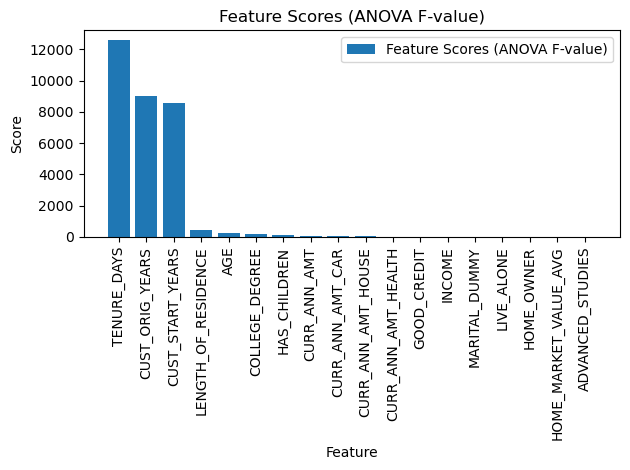


Selected Features (ANOVA F-value):
CURR_ANN_AMT_CAR
CURR_ANN_AMT_HOUSE
CUST_ORIG_YEARS
CUST_START_YEARS
TENURE_DAYS
LENGTH_OF_RESIDENCE
AGE
HAS_CHILDREN
COLLEGE_DEGREE
CURR_ANN_AMT


In [75]:
"""
I used SelectKBest with ANOVA F-value scoring rather than chi2 because it can handle the negative values present in the dataframe due to having standirdized the features.
"""

# Initialize logistic regression model
logreg = LogisticRegression()

# Initialize SelectKBest with ANOVA F-value scoring function
fvalue_selector = SelectKBest(score_func=f_classif, k=10)

# Fit SelectKBest to features and target variable
X_kbest_fvalue = fvalue_selector.fit_transform(x, y)

# Get the scores of all features
feature_scores_fvalue = fvalue_selector.scores_

# Get the names of the selected features and their allocation: True for selected, False for not selected
selected_features_fvalue = df_a.drop(["CHURN"], axis=1).columns[fvalue_selector.get_support()]

# Print the scores and features
for feature, score in zip(df_a.drop(["CHURN"], axis=1).columns, feature_scores_fvalue):
    print(f"Feature: {feature}, Score: {score}")

# Create DF with feature and corresponding score and sort in descending order
feature_scores_df_fvalue = pd.DataFrame({
    "Feature": df_a.drop(["CHURN"], axis=1).columns,
    "Score": feature_scores_fvalue
})
feature_scores_df_fvalue = feature_scores_df_fvalue.sort_values(by="Score", ascending=False)

# Plot sorted feature scores
plt.bar(feature_scores_df_fvalue["Feature"], feature_scores_df_fvalue["Score"], label="Feature Scores (ANOVA F-value)")
plt.xlabel("Feature")
plt.ylabel("Score")
plt.title("Feature Scores (ANOVA F-value)")
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print("\nSelected Features (ANOVA F-value):")
for feature in selected_features_fvalue:
    print(feature)

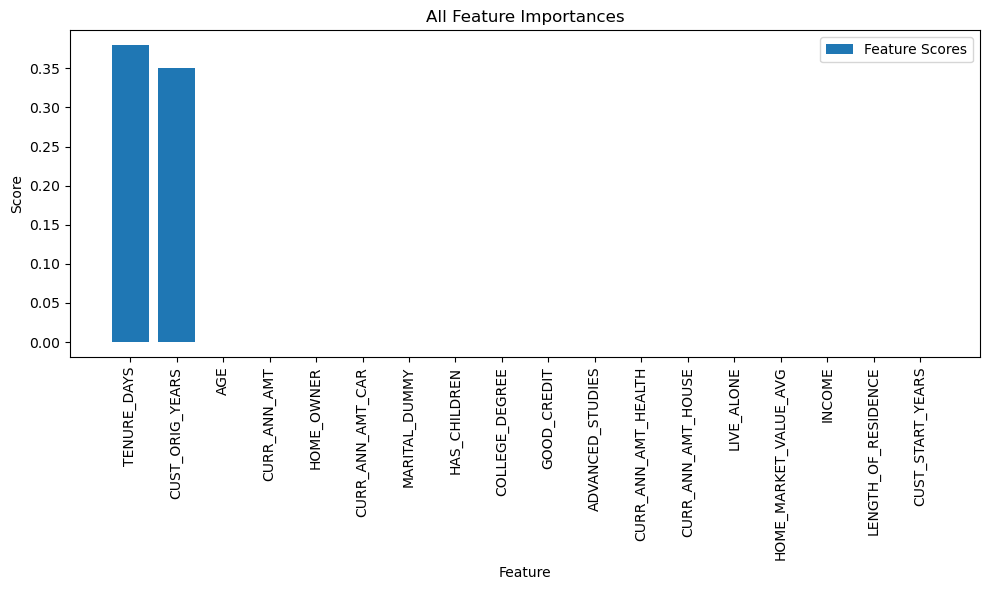

                  importance
TENURE_DAYS         0.379686
CUST_ORIG_YEARS     0.350903
AGE                 0.000098
CURR_ANN_AMT        0.000019
HOME_OWNER          0.000011
CURR_ANN_AMT_CAR    0.000010
MARITAL_DUMMY       0.000010
HAS_CHILDREN        0.000009
COLLEGE_DEGREE      0.000007
GOOD_CREDIT         0.000005


In [76]:
# Logistic Regression model
logreg = LogisticRegression()

# Fitting the model
logreg.fit(x, y)

# Permutation Importance with Logistic Regression for classification
perm_importance_result = permutation_importance(logreg, x, y, n_repeats=20, random_state=42)

# Displaying top 10 feature importances
feature_importances = pd.DataFrame(perm_importance_result.importances_mean, index=x.columns, columns=['importance']).sort_values('importance', ascending=False)

# Plotting all feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances.index, feature_importances['importance'], label="Feature Scores")
plt.xlabel("Feature")
plt.ylabel("Score")
plt.title("All Feature Importances")
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Print only the top 10 feature importances
print(feature_importances.head(10))

Before showing the top feature choices, the following points must be raised:
- In comparison to the previous feature selection, only the top five features will be selected due to the very low importance they have been attributed by both models.
- The individual features "CURR_ANN_AMT_HOUSE", "CURR_ANN_AMT_HEALTH", and "CURR_ANN_AMT_CAR" were excluded in favor of the consolidated feature "CURR_ANN_AMT", which encompasses their combined effect. In this way, the model effectively mitigates the issue of high correlation among these variables. This approach minimizes multicollinearity and enables a clearer analysis of how total insurance expenditure influences customer churn. Consequently, this method is predicted to improve the model's predictive performance and interpretability by focusing on the cumulative effect of insurance spending on retention dynamics.
- As seen in the EDA, "CUST_ORIG_YEAR" and "CUST_START_YEARS" have mostly identical values. Since only five features will be implemented in this model, it will be avoided to mention both of these features in the top five.
- In order to avoid potential Data Leakage, "TENURE_DAYS" will be excluded from the features as both this and "CHURN" are related to the "SUSPD_DATE" feature.

Below are the top five feature selection test results. 

**Domain knowledge**: "CURR_ANN_AMT", "HOME_OWNER", "AGE", "GOOD_CREDIT", "MARITAL_DUMMY"

**SelectKBest**: "CUST_ORIG_YEARS", "LENGTH_OF_RESIDENCE",  "AGE", "COLLEGE_DEGREE", "HAS_CHILDREN"

**Permutation Importance**: "CUST_ORIG_YEARS", "AGE", "CURR_ANN_AMT", "HOME_OWNER", "MARITAL_DUMMY"

In [77]:
"""
Incorporating both domain expertise and model-based feature evaluation to select the top 10 features ensures a balanced approach to model development.
"""

# Combine all column names into a single list
all_columns = ["MARITAL_DUMMY", "CURR_ANN_AMT", "HOME_OWNER", "AGE", "GOOD_CREDIT",
               "HAS_CHILDREN", "CUST_ORIG_YEARS", "LENGTH_OF_RESIDENCE",  "AGE", "COLLEGE_DEGREE"
               "MARITAL_DUMMY", "CUST_ORIG_YEARS", "AGE", "CURR_ANN_AMT", "HOME_OWNER"
]

# Count the frequency of each column name
column_frequency = Counter(all_columns)

# Sort the dictionary by values (frequency) in descending order
sorted_frequency = dict(sorted(column_frequency.items(), key=lambda item: item[1], reverse=True))

# Print the frequency of each column name in descending order
for column, frequency in sorted_frequency.items():
    print(f"{column}: {frequency}")

AGE: 3
CURR_ANN_AMT: 2
HOME_OWNER: 2
CUST_ORIG_YEARS: 2
MARITAL_DUMMY: 1
GOOD_CREDIT: 1
HAS_CHILDREN: 1
LENGTH_OF_RESIDENCE: 1
COLLEGE_DEGREEMARITAL_DUMMY: 1


In [78]:
selected_feature_Q2 = ["AGE", "CURR_ANN_AMT", "HOME_OWNER", "CUST_ORIG_YEARS", "MARITAL_DUMMY"]

##### LOGISTIC REGRESSION - Baseline Model


A simple **Logistic Regression** will be utilized as a foundational model for understanding customer churn at ABC Insurance. This choice allows for straightforward interpretation of how various features influence the likelihood of churn, setting a benchmark for comparison with more complex models.

The evaluation metrics from sklearn to assess model performance will include:

- **Accuracy**
> Accuracy measures the proportion of total predictions that were correctly classified, providing a general overview of model performance across both classes.

- **Recall**
> Recall (or sensitivity) assesses the model's ability to correctly identify actual positives from the data, crucial for minimizing the risk of overlooking customers at high risk of churn.

- **Precision**
> Precision evaluates the proportion of positive identifications that were actually correct, important for ensuring targeted interventions are relevant and effective.

- **AUC-ROC**
> The Area Under the Receiver Operating Characteristic curve (AUC-ROC) quantifies the model's ability to discriminate between the churned and retained customers, indicating the overall effectiveness of the model in ranking predictions.

These metrics collectively provide a nuanced understanding of logistic regression model performance, balancing the trade-offs between different types of errors, and offering insights essential for refining ABC Insurance's customer retention strategies.

In [79]:
x_a = df_b[selected_feature_Q2]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_a, y, test_size=0.2, random_state=42)

# Logistic Regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(x_train, y_train)

# Predict the target variable on the test data
y_pred = logreg.predict(x_test)

# Calculate and print the evaluation metrics
print("Logistic Regression:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, logreg.predict_proba(x_test)[:, 1]))

Logistic Regression:
Accuracy Score: 0.9167365491841716
Precision Score: 0.9167365491841716
Recall Score: 1.0
ROC AUC Score: 0.5794127291471076


<Figure size 800x800 with 0 Axes>

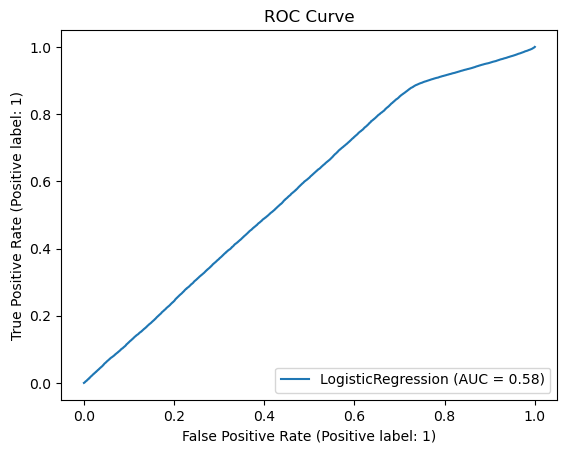

In [80]:
# Plot ROC curve
plt.figure(figsize=(8, 8))
RocCurveDisplay.from_estimator(logreg, x_test, y_test)
plt.title('ROC Curve')
plt.show()

##### Model Evaluation
- Accuracy Score of 0.91673 suggests that 91.67% of predictions match the actual outcomes, indicating a high level of overall prediction correctness.

- Precision Score of 0.91673 indicates that 91.67% of the positive (churned customers) predictions were accurate, showcasing the model's ability to correctly identify churned customers.

- Recall Score of 1.0 means the model successfully identified all actual cases of churn, highlighting its sensitivity and effectiveness in capturing all potential churn instances.

- ROC AUC Score of 0.57941 indicates a modest ability of the model to distinguish between classes, suggesting room for improvement in predictive accuracy.

These metrics together highlight the model's strong performance in predicting churn, with high accuracy and precision alongside perfect recall, demonstrating its effectiveness in identifying all churn instances, despite the need for enhanced differentiation between classes as indicated by the ROC AUC Score.

However, given the imbalance in sample sizes between the two labels of CHURN, it's vital for ABC Insurance to proceed with caution when applying predictive models to address the feature. This imbalance could potentially bias the model's outcomes, skewing the prediction accuracy and, subsequently, the strategies derived from these predictions. Therefore, any model selected for this purpose should be used with an awareness of its limitations and with strategies in place to mitigate potential biases.

#### Q3.2 Build a second model and compare the model performance. (15 points)

The **Random Forest Classifier** is the second model which will be compared against the logistic regression. This model is known to excel in managing complex datasets with numerous features, adeptly capturing non-linear relationships. It offers high accuracy and robustness against overfitting through ensemble learning. However, its model interpretability is lower compared to simpler models like logistic regression. Its ability to process diverse data types and uncover intricate patterns makes it a powerful choice for predicting customer churn, striking a balance between performance and complexity.

In [81]:
# Create a Random Forest Classifier model
rf_classifier = RandomForestClassifier()

# Fit the model on the training data
rf_classifier.fit(x_train, y_train)

# Predict the target variable on the test data
y_pred_rf = rf_classifier.predict(x_test)

# Calculate and print the evaluation metrics
print("Random Forest Classifier:")
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("Precision Score:", precision_score(y_test, y_pred_rf))
print("Recall Score:", recall_score(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, rf_classifier.predict_proba(x_test)[:, 1]))

Random Forest Classifier:
Accuracy Score: 0.8601436898653806
Precision Score: 0.9186158459887052
Recall Score: 0.9298176835392468
ROC AUC Score: 0.5363377723880655


<Figure size 800x800 with 0 Axes>

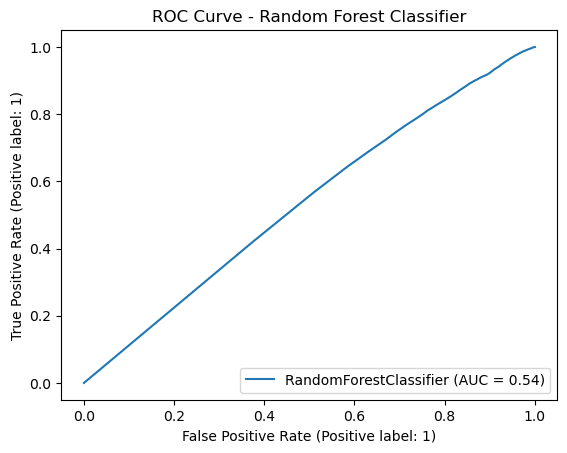

In [82]:
# Plot ROC curve for Random Forest Classifier
plt.figure(figsize=(8, 8))
RocCurveDisplay.from_estimator(rf_classifier, x_test, y_test)
plt.title('ROC Curve - Random Forest Classifier')
plt.show()

##### Model Evaluation
The Random Forest Classifier demonstrates strong performance in predicting customer churn, as evidenced by the following metrics:

- Accuracy Score of 0.86014 suggests a high level of correct predictions, indicating that 86.01% of the model's predictions match the actual outcomes.
- Precision Score of 0.91861 shows that about 91.86% of the model’s predictions for churned customers are accurate, underlining its capability in precisely identifying customers at risk of churn.
- Recall Score of 0.92981, which is close to perfect, signifies the model's effectiveness in identifying almost all actual cases of churn, minimizing the chance of overlooking customers who are likely to leave.
- ROC AUC Score of 0.53633, while indicating some ability to distinguish between customers who will churn and those who will not, suggests there is room for improvement in the model's discriminative power.

These metrics collectively affirm the Random Forest Classifier's robustness in detecting churn, with particularly high precision and recall scores highlighting its strength in accurately identifying customers likely to churn. However, the ROC AUC Score indicates a need for further model refinement to enhance its overall predictive accuracy and reliability.

However, it is important to keep in consideration the strong label imbalance in CHURN mentioned before.

#### Q3.3 Based on the analysis, suggest a model to the head of marketing and an application scenario. Please justify your decisions. (10 points)

For ABC Insurance's critical goal of enhancing customer retention strategies, the **Logistic Regression model** emerges as the preferred choice, despite the good performance also by the Random Forest Classifier. The Logistic Regression model's distinguishing performance metrics—accuracy of 0.91673, precision of 0.91673, perfect recall score of 1.0, and an ROC AUC Score of 0.57941—underscore its suitability for predicting customer churn. The model's strength resides in its exceptional clarity and interpretability, which clarify the factors leading to customer churn, thereby directly supporting targeted, effective marketing strategies aimed at retaining valuable customers. This level of interpretability is crucial for the marketing team, facilitating the application of insights to develop nuanced retention strategies and adjust them as needed based on a clear understanding of customer behavior.

Moreover, although the Logistic Regression model's perfect recall is particularly advantageous for identifying all potential churn risks, it is essential to consider the imbalance in sample sizes between the two labels of CHURN. It's vital for ABC Insurance to proceed with caution when relying on this model to identify customers at risk of churning. Future analysis should focus on training models which take this inbalance into consideration. It's important to proceed with an awareness of its limitations, including the need for further model refinement and exploration of additional predictive variables to enhance its predictive power. Future efforts should also explore integrating more complex models for comparison, ensuring ABC Insurance remains agile and responsive to emerging customer retention challenges.


**APPLICATION SCENARIO:**  In this context, this model could serve as an effective tool for initially tackling the churn prediction challenge, despite the need for careful consideration of the sample size imbalance. For instance, the model could help identify key characteristics of customers who are more likely to churn, enabling the creation of **personalized retention campaigns** or **loyalty programs** tailored to these individuals' needs and preferences. Predictive analytics could further refine customer engagement by anticipating churn risk based on certain behaviors or changes in customer data, allowing for proactive measures to be taken. Additionally, understanding the **relationship between features and probability of churning** can help identify the main drivers which lead to a customer suspending their policy. With this information, the marketing department can guide product or service improvements, ensuring that ABC Insurance's offerings more closely align with customer expectations and needs. If the marketing team matches the information provided by the model with information regarding comeptitors and new entrants in the market could aid in **transforming the high degree of churns into a strategic advantage** and potentially also capture new market share.